In [ ]:
## initializing the libraries
import numpy as np                       ## this library is used for working with arrays  
import pandas as pd                      ## this library is used for working with dataframes
import matplotlib.pyplot as plt          ## for plotting
import seaborn as sns                    ## for plotting 
from sklearn.experimental import enable_iterative_imputer      
from sklearn.impute import IterativeImputer                ## feature imputation, dealing the missing feature variables
from sklearn.preprocessing import MinMaxScaler             ## for Normalising the feature values
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder             ## Encoded the caegorical label into numerical value
from sklearn.inspection import permutation_importance      ## for getting the features importance value
from sklearn.feature_selection import RFECV                ## For eliminating features recursively
from sklearn.model_selection import GridSearchCV           ## For hyper parameter tuning using cross-validation 
from sklearn.svm import SVC                                ## For implementing Support Vector Machine ( Classifier )
from sklearn.neural_network import MLPClassifier           ## For implementing Neural Network architecture
from sklearn.ensemble import RandomForestClassifier        ## For implementing Random Forest Classifier
from sklearn.linear_model import LogisticRegression        ## For implementing Logistic Regression Classifier
from sklearn.metrics import classification_report, confusion_matrix    ## For getting Classification report (accuracy, precision, recall, f1-score) and confusion matrix

Objective 1:

Question 1 : Read the data using pandas read_csv command

In [ ]:
Data= pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv')

In [ ]:
Data                                      ## Data has 762 samples and 79 columns

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


Question 2(c) : For both binary and multiclass classification it can be seen that the classes are pretty much balanced. But for multiclass, 4th class is not balanced. As it is almost 58% of the class with highest samples

In [ ]:
pd.DataFrame(Data['Treatment_Behavior']).value_counts()

Treatment_Behavior
Memantine_C/S         225
Memantine_S/C         225
Saline_C/S            180
Saline_S/C            132
dtype: int64

In [ ]:
pd.DataFrame(Data['Genotype']).value_counts()

Genotype
Control     435
Ts65Dn      327
dtype: int64

In [ ]:
features_data = Data.drop(['Genotype' , 'Treatment_Behavior'] , axis = 1)    ## Dropping the columns of the class labels from the training data

In [ ]:
features_data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197436,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


Question 2(a) : Drop the columns which have more than 150 nan values.. 

In [ ]:
max_nan = int(input(' Enter the maximum allowable nan values : '))    ## this variable takes maximum allowable number of nan values in a feature variable as input
## this function takes the feature variables and maximum allowable nan value in a column as inputs and returns the name of the dropped columns and new feaure_matrix after removing 
##those feature variables
def drop_nan_value_features(feature_matrix , nan):                    
  drop_columns = []                          ## this list stores the column heading of the dropped features 
  for i in range(feature_matrix.shape[1]):   ## i iterates through the number of features / variables
    if feature_matrix.iloc[:,i].isna().sum() >= nan :
      drop_columns.append( feature_matrix.columns[i] )          ## if nan values in a feature column more than max_nan, then store that variable name in the list
  feature_matrix_new = feature_matrix.drop(drop_columns, axis = 1)     ## construct new feature_matrix after removing the strored feature column headings from the feature data
  return feature_matrix_new , drop_columns

 Enter the maximum allowable nan values : 150


In [ ]:
features_data_new ,dropped_columns = drop_nan_value_features(features_data , max_nan)         ## these two variabes store the new feature_matrix and dropped features column's headings respectively

In [ ]:
features_data_new

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.119428,0.115567,0.441207,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.118081,0.108944,0.444913,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.116134,0.114635,0.422789,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.120649,0.459901,1.543274


In [ ]:
features_data_new.shape

(762, 72)

In [ ]:
print('name of the dropped columns are : ' , dropped_columns)   

name of the dropped columns are :  ['BAD_N', 'BCL2_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']


Question 3 : Filling nan values using multivariate feature imputation

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)        ## define multivariate feature imputation with maximum iteration of 10
imputer.fit( features_data_new )                               ## fit on the new training feature matrix
features = imputer.transform(features_data_new)                ## transform the training features and filling up the nan values by imputation

In [ ]:
features = pd.DataFrame(features , columns = features_data_new.columns)     ## This DataFrame stores the training features after using imputation

In [ ]:
features

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.108336,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.104315,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.106219,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.111262,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.110694,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.119428,0.115567,0.441207,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.118081,0.108944,0.444913,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.116134,0.114635,0.422789,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.120649,0.459901,1.543274


In [ ]:
features.shape

(762, 72)

Feature Normalization : Feature normalization is used to make all the features in the same scale, so all the features have same importance. 


In [ ]:
Scaler = MinMaxScaler()                                                     ## Define MinMaxScaler for feature normalisation
Scaler.fit(features)                                                        ## fit on the training features
normalized_features = Scaler.transform(features)                            ## transform the training features

In [ ]:
normalized_features = pd.DataFrame(normalized_features , columns = features.columns)    ## stores the dataframe of normalised feature matrix

In [ ]:
normalized_features

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
0,0.141964,0.206582,0.778929,0.598198,0.627323,0.418953,0.448666,0.179985,0.617322,0.232553,...,0.432843,0.483783,0.046679,0.256699,0.405228,0.133965,0.426816,0.257612,0.336299,0.705738
1,0.146642,0.181725,0.718187,0.586752,0.581701,0.399583,0.429899,0.165355,0.590173,0.205362,...,0.472327,0.477640,0.056774,0.226088,0.433471,0.193010,0.429952,0.229167,0.365208,0.749771
2,0.144325,0.199336,0.739766,0.543079,0.572284,0.392514,0.441381,0.163775,0.607102,0.199194,...,0.467603,0.484953,0.046425,0.214719,0.429387,0.158667,0.448652,0.242637,0.353621,0.868229
3,0.115730,0.150943,0.542794,0.449063,0.476206,0.429874,0.444307,0.140281,0.486945,0.205135,...,0.364359,0.449304,0.124345,0.208943,0.407971,0.150629,0.392700,0.278314,0.265619,0.721879
4,0.112675,0.151094,0.543375,0.405882,0.437206,0.403540,0.433100,0.137002,0.410194,0.189152,...,0.393332,0.480334,0.121953,0.215528,0.480342,0.219591,0.410187,0.274295,0.350381,0.812053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.095294,0.153773,0.403975,0.294157,0.227277,0.461224,0.539931,0.329707,0.563483,0.138965,...,0.444118,0.616606,0.320227,0.336327,0.676031,0.273383,0.570243,0.308771,0.364462,0.575377
758,0.098521,0.169114,0.421390,0.328257,0.241792,0.466656,0.501075,0.361182,0.615645,0.144513,...,0.464179,0.639116,0.357769,0.351952,0.742991,0.240613,0.555524,0.261914,0.371858,0.602682
759,0.090184,0.137887,0.410514,0.280479,0.191231,0.528828,0.548111,0.293411,0.571988,0.144203,...,0.375593,0.538972,0.346172,0.387964,0.592151,0.248596,0.534245,0.302178,0.327695,0.548842
760,0.083124,0.131757,0.342682,0.251851,0.147856,0.490315,0.499328,0.282986,0.541237,0.131677,...,0.412586,0.602270,0.357600,0.403414,0.667230,0.177844,0.583591,0.344728,0.401777,0.619962


Removing features based on variance  :  Remove only those feature columns which have zero variance

In [ ]:
def drop_zero_variance_features(feature_matrix):      ## This function takes the training feature matrix as the input
  drop_columns = []                                   ## this list stores the names of the feature variables which have zero variance
  for i in range(feature_matrix.shape[1]):            ## i is iterating through the number of features / variables
    if np.array(feature_matrix.iloc[:,i]).var() == 0 :   ## if variance of that feature column is 0, then only drop that specific feature, 
      drop_columns.append( feature_matrix.columns[i] )   ## this list appens the feature headings
  feature_matrix_new = feature_matrix.drop(drop_columns, axis = 1)   ## Drop the features which have zero variance
  return feature_matrix_new , drop_columns

In [ ]:
features_new , zero_variance_columns = drop_zero_variance_features(normalized_features)

In [ ]:
zero_variance_columns        ## Any feature with 762 samples has zero variance

[]

 Question 2(b) : Removing correlated features, if the absolute value of correlation between two features is greater than 0.93, then removing any one feature between the two features


In [ ]:
corr_matrix = features_new.corr()
corr_matrix

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,-0.182126,-0.085401,-0.158167,0.082463,0.811398,...,-0.243189,-0.162544,-0.401000,-0.428442,0.339879,-0.223812,-0.358480,-0.249935,-0.035929,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,-0.149509,-0.068712,-0.114789,0.200468,0.796880,...,-0.138549,-0.089496,-0.430173,-0.370611,0.403635,-0.220720,-0.299066,-0.321841,0.039384,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,0.055620,0.046813,-0.214369,-0.031408,0.235227,-0.112984,0.070504,-0.261881,0.454025,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,0.200738,0.324115,-0.247044,0.074819,0.245469,-0.100915,0.227674,-0.355890,0.486483,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,0.129107,0.184531,-0.311324,0.002289,0.117841,-0.237932,0.215495,-0.401223,0.377628,0.185840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SHH_N,-0.223812,-0.220720,-0.112984,-0.100915,-0.237932,0.113274,0.107594,0.065394,0.044608,-0.190035,...,0.195775,0.233734,0.505187,0.316371,0.288273,1.000000,0.388021,0.538729,0.115625,-0.166451
pS6_N,-0.358480,-0.299066,0.070504,0.227674,0.215495,0.329791,0.268852,0.417864,0.291003,-0.204637,...,0.505705,0.588040,0.584767,0.702910,0.052804,0.388021,1.000000,0.169090,0.392329,-0.415155
pCFOS_N,-0.249935,-0.321841,-0.261881,-0.355890,-0.401223,0.084886,0.134206,-0.061822,-0.213143,-0.167895,...,0.072955,-0.128116,0.644965,0.229688,-0.077440,0.538729,0.169090,1.000000,0.040611,-0.324501
SYP_N,-0.035929,0.039384,0.454025,0.486483,0.377628,0.199349,0.232262,0.187727,0.383455,0.003932,...,0.525524,0.404700,0.140256,0.343885,0.345046,0.115625,0.392329,0.040611,1.000000,0.273142


In [ ]:
## this function takes the feature matrix and maximum allowable correlation value as the inputs and returns correlated feature column names and feature matrix after removing the 
## correlated features as the output
def remove_correlated_features(feature_data, allowable_correlation_value):
  correlated_feature_columns = set()               ## this set will store the correlated feature column names 
  correlation_matrix = feature_data.corr()         ## it gives the correlation matrix of shape(67 , 67) between 67 features
  for i in range(correlation_matrix.shape[0]):     ## i iterates through the number of features
    for j in range(i):                             ## j iterates through the values of i, as correlation matrix is a symmetric matrix, then does not need to check correlation value between two features twice
      if np.abs(correlation_matrix.iloc[i,j]) >= allowable_correlation_value:  ## if correlation value between two features more than the absolute value of maximum allowable correlation
                                                                               ## then add the feature names and drop those correlated features     
        correlated_feature_columns.add(correlation_matrix.columns[i])
  training_features = feature_data.drop(list(correlated_feature_columns) , axis=1)
  return training_features , correlated_feature_columns

In [ ]:
max_correlation_value = float(input('Enter the maximum allowable correlation value : '))    ##it stores the maximum allowable correlation value
training_features , correlated_feature_columns = remove_correlated_features(features_new, max_correlation_value)

Enter the maximum allowable correlation value : 0.93


In [ ]:
correlated_feature_columns

{'BRAF_N', 'ITSN1_N', 'pERK_N', 'pNR1_N', 'pS6_N'}

In [ ]:
training_features

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pCFOS_N,SYP_N,CaNA_N
0,0.141964,0.778929,0.598198,0.627323,0.418953,0.448666,0.179985,0.617322,0.232553,0.576167,...,0.169702,0.432843,0.483783,0.046679,0.256699,0.405228,0.133965,0.257612,0.336299,0.705738
1,0.146642,0.718187,0.586752,0.581701,0.399583,0.429899,0.165355,0.590173,0.205362,0.559556,...,0.212421,0.472327,0.477640,0.056774,0.226088,0.433471,0.193010,0.229167,0.365208,0.749771
2,0.144325,0.739766,0.543079,0.572284,0.392514,0.441381,0.163775,0.607102,0.199194,0.541938,...,0.202733,0.467603,0.484953,0.046425,0.214719,0.429387,0.158667,0.242637,0.353621,0.868229
3,0.115730,0.542794,0.449063,0.476206,0.429874,0.444307,0.140281,0.486945,0.205135,0.554293,...,0.184790,0.364359,0.449304,0.124345,0.208943,0.407971,0.150629,0.278314,0.265619,0.721879
4,0.112675,0.543375,0.405882,0.437206,0.403540,0.433100,0.137002,0.410194,0.189152,0.532161,...,0.187625,0.393332,0.480334,0.121953,0.215528,0.480342,0.219591,0.274295,0.350381,0.812053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.095294,0.403975,0.294157,0.227277,0.461224,0.539931,0.329707,0.563483,0.138965,0.602155,...,0.439698,0.444118,0.616606,0.320227,0.336327,0.676031,0.273383,0.308771,0.364462,0.575377
758,0.098521,0.421390,0.328257,0.241792,0.466656,0.501075,0.361182,0.615645,0.144513,0.629199,...,0.458422,0.464179,0.639116,0.357769,0.351952,0.742991,0.240613,0.261914,0.371858,0.602682
759,0.090184,0.410514,0.280479,0.191231,0.528828,0.548111,0.293411,0.571988,0.144203,0.685304,...,0.428177,0.375593,0.538972,0.346172,0.387964,0.592151,0.248596,0.302178,0.327695,0.548842
760,0.083124,0.342682,0.251851,0.147856,0.490315,0.499328,0.282986,0.541237,0.131677,0.620211,...,0.506575,0.412586,0.602270,0.357600,0.403414,0.667230,0.177844,0.344728,0.401777,0.619962


In [ ]:
training_features.shape

(762, 67)

Question 5 :  Classification 1 : Binary Classification

In [ ]:
training_label = Data['Genotype']
label = LabelEncoder()                         ## LabelEncoder() has been used to convert categorical values into numerical values, ML algorithms can not perform with categorical values
y_train = label.fit_transform(training_label)   ## fit and transform the categorical label 

Linear SVM

In [ ]:
# This function takes training features and labels as inputs and returns cross-validation results, best_parameter and best cross-validation score
def Linear_SVM(x,y):
  parameters = { 'C' : [0.1 ,1 ,10 , 100] , 'kernel' : ['linear'] }     ## Linear kearnel has been used, so only hyperparameter is C (regularization value)
  SVM_linear_clf = GridSearchCV(SVC(), param_grid = parameters, cv = 5)  ## GridSearchCV has been used to get the different hyperparameter tuned results with 5 cross-validation
  SVM_linear_clf.fit( x, y )                                             ## fit the training features and labels using best hyperparameter from GridSearchCV
  return  pd.DataFrame(SVM_linear_clf.cv_results_) , SVM_linear_clf.best_params_ ,  SVM_linear_clf.best_score_ 

In [ ]:
Linear_SVM_result , best_parameter_linear_SVM , best_score_linear_SVM = Linear_SVM(training_features, y_train)

In [ ]:
Linear_SVM_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018042,0.004151,0.005649,0.001097,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.725490,0.738562,0.723684,0.684211,0.835526,0.741495,0.050409,3
1,0.012303,0.000977,0.003917,0.000039,1,linear,"{'C': 1, 'kernel': 'linear'}",0.830065,0.803922,0.743421,0.690789,0.888158,0.791271,0.068466,1
2,0.011657,0.000896,0.003071,0.000069,10,linear,"{'C': 10, 'kernel': 'linear'}",0.810458,0.836601,0.684211,0.657895,0.868421,0.771517,0.084469,2
3,0.016619,0.001832,0.002933,0.000117,100,linear,"{'C': 100, 'kernel': 'linear'}",0.784314,0.816993,0.598684,0.572368,0.730263,0.700525,0.098250,4


In [ ]:
print('best hyperparameter using Linear SVM is : ' , best_parameter_linear_SVM)

best hyperparameter using Linear SVM is :  {'C': 1, 'kernel': 'linear'}


In [ ]:
print('best cross-validation score using Linear SVM is : ' , best_score_linear_SVM)

best cross-validation score using Linear SVM is :  0.7912710698314414


In [ ]:
Linear_SVM = SVC( C = 1 , kernel = 'linear' )  ## now using best hypermeter obtained from GridSearchCV to fit the training features and training Labels
Linear_SVM.fit( training_features , y_train)
y_predicted_Linear_SVM = Linear_SVM.predict(training_features)    ## predict the Training features

In [ ]:
print(classification_report(y_train , y_predicted_Linear_SVM ))      ## It gives the classification report (accuracy , precision , recall , f1-score values)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       435
           1       0.99      0.96      0.98       327

    accuracy                           0.98       762
   macro avg       0.98      0.98      0.98       762
weighted avg       0.98      0.98      0.98       762



[Text(0, 0.5, 'Control'), Text(0, 1.5, 'Ts65Dn')]

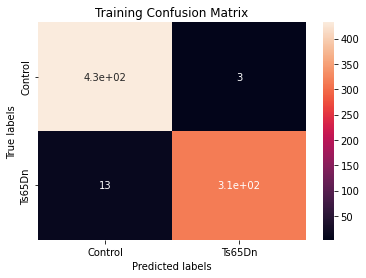

In [ ]:
cm_Linear_SVM = confusion_matrix(y_train , y_predicted_Linear_SVM)  ## it results the confusion matrix using Linear SVM
ax=plt.subplot()
sns.heatmap(cm_Linear_SVM , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(['Control', 'Ts65Dn'])
ax.yaxis.set_ticklabels(['Control', 'Ts65Dn'])

Same process has been followed up for other classifiers also, but with changing classifiers , hyperparameters are changing accordingly

RBF Kernel SVM

In [ ]:
def RBF_SVM(x,y):
  parameters = { 'C' : [0.1 ,1 ,10 , 100] , 'gamma' : [ 0.0001, 0.001, 0.01, 0.1, 1, 10 ], 'kernel' : ['rbf'] }   ## RBF kearnel has been used with SVM, so hyperparameters are C (regularization) and gamma (kernel_width)
  SVM_RBF_clf = GridSearchCV(SVC(), param_grid = parameters, cv = 5)
  SVM_RBF_clf.fit( x, y )
  return pd.DataFrame(SVM_RBF_clf.cv_results_) , SVM_RBF_clf.best_params_ , SVM_RBF_clf.best_score_ 

In [ ]:
RBF_SVM_result , best_parameter_RBF_SVM , best_score_RBF_SVM  = RBF_SVM(training_features, y_train)

In [ ]:
RBF_SVM_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037352,0.004652,0.017966,0.001711,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.568627,0.568627,0.572368,0.572368,0.572368,0.570872,0.001833,18
1,0.036409,0.002227,0.016985,0.000219,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.568627,0.568627,0.572368,0.572368,0.572368,0.570872,0.001833,18
2,0.035103,0.001525,0.017330,0.000356,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.568627,0.568627,0.572368,0.572368,0.572368,0.570872,0.001833,18
3,0.026188,0.003051,0.010352,0.000878,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.568627,0.568627,0.572368,0.710526,0.572368,0.598504,0.056036,10
4,0.025678,0.003672,0.011544,0.002471,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.588235,0.601307,0.532895,0.493421,0.730263,0.589224,0.080486,14
5,0.028379,0.000727,0.010796,0.000039,0.1,10,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.568627,0.568627,0.572368,0.572368,0.572368,0.570872,0.001833,18
6,0.026774,0.002788,0.011172,0.002408,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.568627,0.568627,0.572368,0.572368,0.572368,0.570872,0.001833,18
7,0.024086,0.000455,0.010812,0.002230,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.568627,0.568627,0.572368,0.572368,0.572368,0.570872,0.001833,18
8,0.023751,0.000675,0.009604,0.000058,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.568627,0.594771,0.526316,0.592105,0.598684,0.576101,0.027015,17
9,0.018348,0.001240,0.007414,0.000227,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.777778,0.771242,0.756579,0.677632,0.848684,0.766383,0.054589,5


In [ ]:
print('best hyperparameter using SVM with RBF kernel are : ' , best_parameter_RBF_SVM)

best hyperparameter using SVM with RBF kernel are :  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
print('best cross-validation score using SVM with RBF kerrnel is : ' , best_score_RBF_SVM)

best cross-validation score using SVM with RBF kerrnel is :  0.8135448916408669


In [ ]:
RBF_SVM = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
RBF_SVM.fit(training_features, y_train)                ## best hyperparameters are using to fit the training features and labels with RBF SVM
y_predicted_RBF_SVM = RBF_SVM.predict( training_features)

In [ ]:
print(classification_report(y_train , y_predicted_RBF_SVM ))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       435
           1       0.99      0.97      0.98       327

    accuracy                           0.98       762
   macro avg       0.98      0.98      0.98       762
weighted avg       0.98      0.98      0.98       762



[Text(0, 0.5, 'Control'), Text(0, 1.5, 'Ts65Dn')]

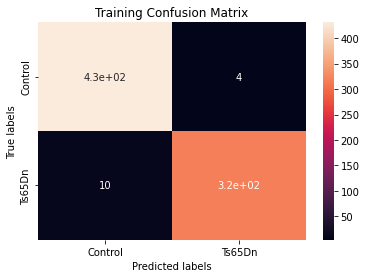

In [ ]:
cm_RBF_SVM = confusion_matrix(y_train , y_predicted_RBF_SVM)
ax=plt.subplot()
sns.heatmap(cm_RBF_SVM , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(['Control', 'Ts65Dn'])
ax.yaxis.set_ticklabels(['Control', 'Ts65Dn'])

Neural Network with one hidden layrer

In [ ]:
def Neural_Network(x,y):
  parameters = { 'hidden_layer_sizes' : [(32, ) , (64, ) , (128 , )] , 'alpha' : [ 0.0001, 0.001, 0.01, 0.1 ] , 'solver' : ['lbfgs'] , 'activation' : ['relu'] , 'max_iter' : [1000] }
  ## hyperparameters are hidden layer's neurons numbers, alpha(weight_decay) value, lbfgs solver, relu activation in the hidden layer and maximum iteration as 1000
  NN_clf = GridSearchCV(MLPClassifier(early_stopping= True), param_grid = parameters, cv = 5)
  NN_clf.fit( x, y )
  return pd.DataFrame(NN_clf.cv_results_) , NN_clf.best_params_ , NN_clf.best_score_

In [ ]:
NN_result , best_paramater_NN , best_score_NN = Neural_Network(training_features, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
NN_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.170933,0.043534,0.007188,0.007184,relu,0.0001,"(32,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.712418,0.803922,0.572368,0.539474,0.848684,0.695373,0.122485,10
1,0.261650,0.015620,0.003606,0.000051,relu,0.0001,"(64,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.810458,0.810458,0.625000,0.585526,0.868421,0.739972,0.112701,5
2,0.465408,0.037686,0.003853,0.000124,relu,0.0001,"(128,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.732026,0.843137,0.657895,0.552632,0.875000,0.732138,0.118714,7
3,0.259155,0.070073,0.004762,0.002279,relu,0.001,"(32,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.732026,0.771242,0.585526,0.565789,0.855263,0.701969,0.110729,9
4,0.839018,0.234783,0.009229,0.001935,relu,0.001,"(64,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.712418,0.790850,0.644737,0.526316,0.769737,0.688811,0.095776,11
5,0.665272,0.320923,0.003692,0.000079,relu,0.001,"(128,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.732026,0.816993,0.671053,0.578947,0.828947,0.725593,0.093335,8
6,0.322754,0.035727,0.003467,0.000028,relu,0.01,"(32,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.816993,0.797386,0.625000,0.638158,0.815789,0.738665,0.087810,6
7,0.566749,0.143200,0.003642,0.000210,relu,0.01,"(64,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.784314,0.816993,0.467105,0.611842,0.750000,0.686051,0.129873,12
8,1.128252,0.441004,0.006826,0.003777,relu,0.01,"(128,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.816993,0.816993,0.644737,0.638158,0.809211,0.745218,0.084802,4
9,1.475959,0.849840,0.003609,0.000115,relu,0.1,"(32,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.862745,0.843137,0.644737,0.664474,0.809211,0.764861,0.091851,3


In [ ]:
print('best hyper parameter using Neural Network is : ' , best_paramater_NN)

best hyper parameter using Neural Network is :  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (128,), 'max_iter': 1000, 'solver': 'lbfgs'}


In [ ]:
print('best cross-validation score using the Neural Network is : ' , best_score_NN)

best cross-validation score using the Neural Network is :  0.7780271757825938


In [ ]:
NN = MLPClassifier(activation = 'relu', alpha = 0.1, hidden_layer_sizes = (128, ), max_iter = 1000, solver = 'lbfgs', early_stopping= True)  ##  neural network is with best hyperparameter and then it is used to fit on the training features and labels  
NN.fit(training_features, y_train)
y_predicted_NN = NN.predict(training_features)

In [ ]:
print(classification_report(y_train , y_predicted_NN ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       327

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



[Text(0, 0.5, 'Control'), Text(0, 1.5, 'Ts65Dn')]

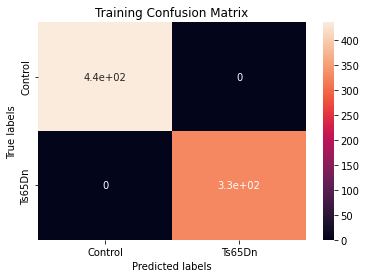

In [ ]:
cm_NN = confusion_matrix(y_train , y_predicted_NN)
ax=plt.subplot()
sns.heatmap(cm_NN , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(['Control', 'Ts65Dn'])
ax.yaxis.set_ticklabels(['Control', 'Ts65Dn'])

Random Forest

In [ ]:
def Random_Forest(x,y):
  parameters = { 'max_depth' : [3, 5, 7, 9] , 'max_features' : [ 'sqrt', 'log2', None ]  }   ## hyperparameters for Random Forest are maximum tree depth (max_depth) and max number of variables per node (max_features)
  RF_clf = GridSearchCV(RandomForestClassifier(), param_grid = parameters, cv = 5)
  RF_clf.fit( x, y )
  return pd.DataFrame(RF_clf.cv_results_) , RF_clf.best_params_ , RF_clf.best_score_ 

In [ ]:
RF_result , best_parameter_RF , best_score_RF = Random_Forest(training_features, y_train)

In [ ]:
RF_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.419634,0.072639,0.016303,0.002235,3,sqrt,"{'max_depth': 3, 'max_features': 'sqrt'}",0.699346,0.660131,0.651316,0.539474,0.782895,0.666632,0.078782,7
1,0.310315,0.014216,0.015763,0.001287,3,log2,"{'max_depth': 3, 'max_features': 'log2'}",0.581699,0.686275,0.552632,0.565789,0.782895,0.633858,0.088217,12
2,1.317387,0.103811,0.019092,0.002852,3,None,"{'max_depth': 3, 'max_features': None}",0.614379,0.758170,0.809211,0.631579,0.717105,0.706089,0.074068,1
3,0.565811,0.011308,0.025446,0.002746,5,sqrt,"{'max_depth': 5, 'max_features': 'sqrt'}",0.633987,0.601307,0.697368,0.611842,0.815789,0.672059,0.079222,5
4,0.404031,0.057933,0.016634,0.002934,5,log2,"{'max_depth': 5, 'max_features': 'log2'}",0.627451,0.568627,0.625000,0.618421,0.743421,0.636584,0.057584,10
5,1.638372,0.037775,0.014790,0.001584,5,None,"{'max_depth': 5, 'max_features': None}",0.594771,0.764706,0.763158,0.598684,0.677632,0.679790,0.074796,4
6,0.540972,0.006913,0.021293,0.001287,7,sqrt,"{'max_depth': 7, 'max_features': 'sqrt'}",0.725490,0.601307,0.671053,0.592105,0.743421,0.666675,0.061971,6
7,0.407171,0.067801,0.017158,0.003630,7,log2,"{'max_depth': 7, 'max_features': 'log2'}",0.653595,0.660131,0.644737,0.565789,0.802632,0.665377,0.076614,8
8,1.861396,0.019860,0.015998,0.003091,7,None,"{'max_depth': 7, 'max_features': None}",0.633987,0.686275,0.756579,0.605263,0.723684,0.681158,0.055692,3
9,0.563566,0.018458,0.020219,0.001624,9,sqrt,"{'max_depth': 9, 'max_features': 'sqrt'}",0.699346,0.607843,0.697368,0.526316,0.769737,0.660122,0.084355,9


In [ ]:
print('best hyperparameters for Random Forest are : ' , best_parameter_RF)

best hyperparameters for Random Forest are :  {'max_depth': 3, 'max_features': None}


In [ ]:
print('best cross-validation score for Random Forest is : ' , best_score_RF)

best cross-validation score for Random Forest is :  0.7060887512899896


In [ ]:
RF = RandomForestClassifier( max_depth = 3, max_features = None)
RF.fit(training_features, y_train)     ## using best hyperparameter to fit on the training features and training labels
y_predicted_RF = RF.predict(training_features)

In [ ]:
print(classification_report(y_train , y_predicted_RF ))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       435
           1       0.95      0.83      0.88       327

    accuracy                           0.91       762
   macro avg       0.91      0.90      0.90       762
weighted avg       0.91      0.91      0.91       762



[Text(0, 0.5, 'Control'), Text(0, 1.5, 'Ts65Dn')]

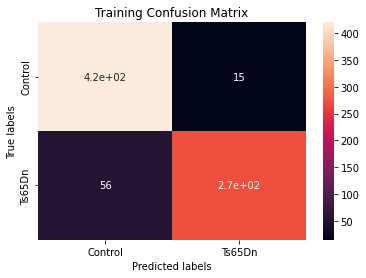

In [ ]:
cm_RF = confusion_matrix(y_train , y_predicted_RF)
ax=plt.subplot()
sns.heatmap(cm_RF , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(['Control', 'Ts65Dn'])
ax.yaxis.set_ticklabels(['Control', 'Ts65Dn'])

Multiclass Classification

In [ ]:
training_label_multiclass = Data['Treatment_Behavior']
y_train_multiclass = label.fit_transform(training_label_multiclass)   ## convert categorical values into numerical values

Linear SVM for multiclass classification

In [ ]:
Linear_SVM_result_multiclass , best_parameter_linear_SVM_multiclass , best_score_linear_SVM_multiclass = Linear_SVM(training_features, y_train_multiclass)

In [ ]:
Linear_SVM_result_multiclass

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017458,0.002526,0.005837,0.000166,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.607843,0.816993,0.703947,0.625000,0.500000,0.650757,0.105543,4
1,0.010541,0.000304,0.003948,0.000116,1,linear,"{'C': 1, 'kernel': 'linear'}",0.660131,0.882353,0.835526,0.723684,0.618421,0.744023,0.100733,3
2,0.010409,0.001005,0.003283,0.000022,10,linear,"{'C': 10, 'kernel': 'linear'}",0.647059,0.849673,0.835526,0.835526,0.664474,0.766452,0.090689,1
3,0.009981,0.000390,0.003096,0.000076,100,linear,"{'C': 100, 'kernel': 'linear'}",0.647059,0.830065,0.828947,0.769737,0.671053,0.749372,0.077279,2


In [ ]:
print('best hyperparameter for Linear SVM with multiclass classification are : ' , best_parameter_linear_SVM_multiclass)

best hyperparameter for Linear SVM with multiclass classification are :  {'C': 10, 'kernel': 'linear'}


In [405]:
print('best cross_validation accuracy score for Linear SVM with multiclass classification are : ' , best_score_linear_SVM_multiclass)

best cross_validation accuracy score for Linear SVM with multiclass classification are :  0.7664516683866529


In [ ]:
Linear_SVM_multiclass = SVC( C = 10, kernel = 'linear')
Linear_SVM_multiclass.fit( training_features, y_train_multiclass)   ## fit on the training features and labels with best hyperparameter value
y_predicted_Linear_SVM_multiclass = Linear_SVM_multiclass.predict(training_features)

In [ ]:
print(classification_report(y_train_multiclass , y_predicted_Linear_SVM_multiclass ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       180
           3       1.00      1.00      1.00       132

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



[Text(0, 0.5, 'Memantine_C/S'),
 Text(0, 1.5, 'Memantine_S/C'),
 Text(0, 2.5, 'Saline_C/S'),
 Text(0, 3.5, 'Saline_S/C')]

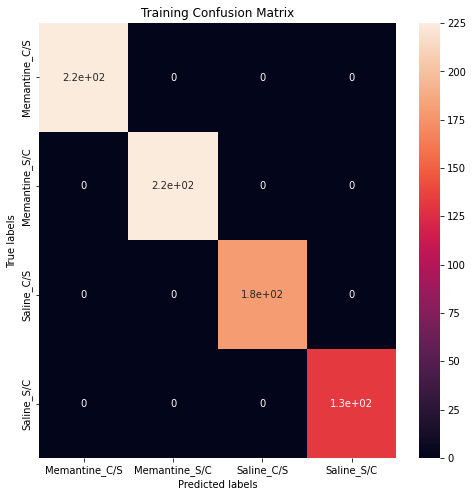

In [ ]:
plt.figure(figsize = (8,8))
cm_Linear_SVM = confusion_matrix(y_train_multiclass , y_predicted_Linear_SVM_multiclass)
ax=plt.subplot()
sns.heatmap(cm_Linear_SVM , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])
ax.yaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])

RBF kernel SVM for multiclass classification

In [ ]:
RBF_SVM_result_multiclass , best_parameter_RBF_SVM_multiclass , best_score_RBF_SVM_multiclass = RBF_SVM(training_features, y_train_multiclass)

In [ ]:
RBF_SVM_result_multiclass

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037845,0.004287,0.011594,0.000278,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.535948,0.542484,0.592105,0.552632,0.585526,0.561739,0.022834,15
1,0.035290,0.001449,0.012295,0.001342,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.535948,0.542484,0.592105,0.552632,0.585526,0.561739,0.022834,15
2,0.040251,0.006650,0.013429,0.003340,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.535948,0.542484,0.592105,0.552632,0.585526,0.561739,0.022834,15
3,0.054822,0.002999,0.020431,0.000740,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.588235,0.562092,0.592105,0.585526,0.592105,0.584013,0.011240,14
4,0.045326,0.004037,0.018366,0.000338,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.581699,0.666667,0.631579,0.611842,0.460526,0.590463,0.070590,10
5,0.060806,0.001739,0.020197,0.001439,0.1,10,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.346405,0.372549,0.348684,0.322368,0.500000,0.378001,0.063034,24
6,0.050428,0.002070,0.019928,0.001021,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.535948,0.542484,0.592105,0.552632,0.585526,0.561739,0.022834,15
7,0.050883,0.001975,0.019851,0.000914,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.535948,0.542484,0.592105,0.552632,0.585526,0.561739,0.022834,15
8,0.044696,0.001683,0.018511,0.000493,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.588235,0.575163,0.592105,0.592105,0.592105,0.587943,0.006563,11
9,0.027257,0.001740,0.014701,0.000359,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.640523,0.843137,0.815789,0.690789,0.519737,0.701995,0.118315,7


In [ ]:
print('best hyperparameters with RBF kernel for multiclass classification are : ' , best_parameter_RBF_SVM_multiclass)

best hyperparameters with RBF kernel for multiclass classification are :  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
print('best cross-validation score with RBF kernel for multiclass classification are : ' , best_score_RBF_SVM_multiclass)

best cross-validation score with RBF kernel for multiclass classification are :  0.7585225318197454


In [ ]:
RBF_SVM_multiclass = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
RBF_SVM_multiclass.fit(training_features, y_train_multiclass)                   ## fit on the training features and labels with best hyperparameter value
y_predicted_RBF_SVM_multiclass = RBF_SVM_multiclass.predict(training_features)

In [ ]:
print(classification_report(y_train_multiclass , y_predicted_RBF_SVM_multiclass ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       180
           3       1.00      1.00      1.00       132

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



[Text(0, 0.5, 'Memantine_C/S'),
 Text(0, 1.5, 'Memantine_S/C'),
 Text(0, 2.5, 'Saline_C/S'),
 Text(0, 3.5, 'Saline_S/C')]

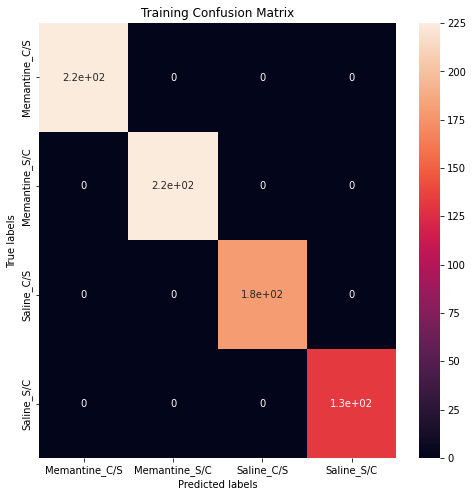

In [ ]:
plt.figure(figsize = (8,8))
cm_RBF_SVM = confusion_matrix(y_train_multiclass , y_predicted_RBF_SVM_multiclass)
ax=plt.subplot()
sns.heatmap(cm_RBF_SVM , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])
ax.yaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])





Neural Network for multiclass classification

In [ ]:
NN_result_multiclass , best_paramater_NN_multiclass , best_score_NN_multiclass= Neural_Network(training_features, y_train_multiclass)

In [ ]:
NN_result_multiclass

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.187581,0.038812,0.003511,0.000076,relu,0.0001,"(32,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.594771,0.764706,0.861842,0.684211,0.546053,0.690316,0.113959,12
1,0.317262,0.074472,0.003648,0.000183,relu,0.0001,"(64,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.588235,0.823529,0.875000,0.776316,0.671053,0.746827,0.103994,5
2,0.429325,0.119355,0.003750,0.000089,relu,0.0001,"(128,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.673203,0.790850,0.901316,0.802632,0.605263,0.754653,0.103994,2
3,0.267470,0.058850,0.003804,0.000441,relu,0.001,"(32,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.614379,0.751634,0.894737,0.684211,0.690789,0.727150,0.094412,10
4,0.490205,0.136730,0.005448,0.003389,relu,0.001,"(64,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.614379,0.803922,0.881579,0.730263,0.723684,0.750765,0.089099,3
5,1.133697,0.537522,0.006462,0.002181,relu,0.001,"(128,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.633987,0.771242,0.960526,0.769737,0.671053,0.761309,0.113326,1
6,0.360187,0.090998,0.003507,0.000009,relu,0.01,"(32,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.673203,0.797386,0.848684,0.769737,0.664474,0.750697,0.071531,4
7,0.540947,0.068796,0.003855,0.000236,relu,0.01,"(64,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.640523,0.830065,0.855263,0.730263,0.598684,0.730960,0.100945,9
8,0.784944,0.113069,0.003733,0.000048,relu,0.01,"(128,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.653595,0.777778,0.861842,0.763158,0.625000,0.736275,0.086522,7
9,1.110212,0.437681,0.007310,0.002433,relu,0.1,"(32,)",1000,lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.653595,0.823529,0.848684,0.763158,0.605263,0.738846,0.094804,6


In [ ]:
print('best hyperparameters with Neural Network for multiclass classification are : ' , best_paramater_NN_multiclass)

best hyperparameters with Neural Network for multiclass classification are :  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128,), 'max_iter': 1000, 'solver': 'lbfgs'}


In [ ]:
print('best cross-validation score with Neural Network for multiclass classification is : ' , best_score_NN_multiclass)

best cross-validation score with Neural Network for multiclass classification is :  0.7613089095287238


In [ ]:
NN_multiclass = MLPClassifier(activation = 'relu', alpha = 0.001, hidden_layer_sizes = (128, ), max_iter = 1000, solver = 'lbfgs', early_stopping= True)
NN_multiclass.fit(training_features, y_train_multiclass)                        ## fit on the training features and labels with best hyperparameter value
y_predicted_NN_multiclass = NN_multiclass.predict(training_features)

In [ ]:
print(classification_report(y_train_multiclass , y_predicted_NN_multiclass ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       180
           3       1.00      1.00      1.00       132

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



[Text(0, 0.5, 'Memantine_C/S'),
 Text(0, 1.5, 'Memantine_S/C'),
 Text(0, 2.5, 'Saline_C/S'),
 Text(0, 3.5, 'Saline_S/C')]

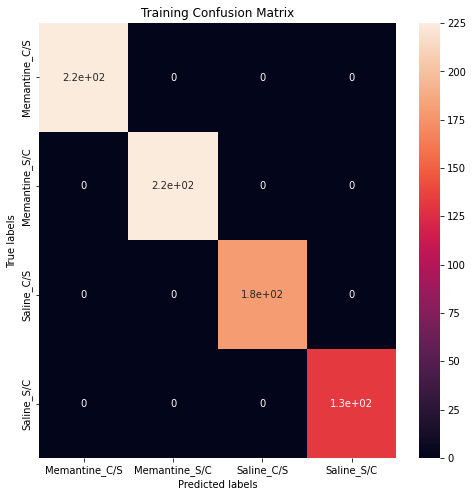

In [ ]:
plt.figure(figsize = (8,8))
cm_NN_SVM = confusion_matrix(y_train_multiclass , y_predicted_NN_multiclass)
ax=plt.subplot()
sns.heatmap(cm_NN_SVM , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])
ax.yaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])

RANDOM FOREST for multiclass classification

In [ ]:
RF_result_multiclass , best_paramater_RF_multiclass , best_score_RF_multiclass = Random_Forest(training_features, y_train_multiclass)

In [ ]:
RF_result_multiclass

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.284153,0.011936,0.014307,0.001075,3,sqrt,"{'max_depth': 3, 'max_features': 'sqrt'}",0.503268,0.699346,0.763158,0.644737,0.493421,0.620786,0.106815,9
1,0.249125,0.005570,0.013643,0.000716,3,log2,"{'max_depth': 3, 'max_features': 'log2'}",0.516340,0.679739,0.736842,0.671053,0.453947,0.611584,0.107510,11
2,1.322495,0.280854,0.016854,0.004608,3,None,"{'max_depth': 3, 'max_features': None}",0.444444,0.653595,0.756579,0.585526,0.552632,0.598555,0.103952,12
3,0.500772,0.072418,0.026259,0.009582,5,sqrt,"{'max_depth': 5, 'max_features': 'sqrt'}",0.549020,0.712418,0.809211,0.651316,0.447368,0.633867,0.125858,8
4,0.440368,0.067070,0.021204,0.004142,5,log2,"{'max_depth': 5, 'max_features': 'log2'}",0.555556,0.718954,0.809211,0.638158,0.453947,0.635165,0.123692,7
5,1.571568,0.027616,0.018576,0.006198,5,None,"{'max_depth': 5, 'max_features': None}",0.503268,0.666667,0.802632,0.565789,0.559211,0.619513,0.105633,10
6,0.389383,0.031536,0.017632,0.004553,7,sqrt,"{'max_depth': 7, 'max_features': 'sqrt'}",0.594771,0.771242,0.822368,0.671053,0.447368,0.661361,0.132905,3
7,0.493217,0.012447,0.021008,0.002468,7,log2,"{'max_depth': 7, 'max_features': 'log2'}",0.588235,0.705882,0.822368,0.644737,0.460526,0.644350,0.120347,4
8,1.795592,0.160025,0.013796,0.000106,7,None,"{'max_depth': 7, 'max_features': None}",0.509804,0.660131,0.802632,0.631579,0.585526,0.637934,0.096770,5
9,0.380434,0.005105,0.015162,0.001934,9,sqrt,"{'max_depth': 9, 'max_features': 'sqrt'}",0.581699,0.758170,0.802632,0.690789,0.480263,0.662711,0.117753,2


In [ ]:
print('best hyperparameters with Random Forest for multiclass classification are : ' , best_paramater_RF_multiclass)

best hyperparameters with Random Forest for multiclass classification are :  {'max_depth': 9, 'max_features': 'log2'}


In [ ]:
print('best cross-validation accuracy score with Neural Network for multiclass classification is : ' , best_score_RF_multiclass)

best cross-validation accuracy score with Neural Network for multiclass classification is :  0.6640264877880977


In [ ]:
RF_multiclass = RandomForestClassifier(max_depth = 9, max_features = 'log2')
RF_multiclass.fit(training_features, y_train_multiclass)         ## fit on the training features and labels with best hyperparameter value
y_predicted_RF_multiclass = RF_multiclass.predict(training_features)

In [ ]:
print(classification_report(y_train_multiclass , y_predicted_RF_multiclass))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       180
           3       1.00      1.00      1.00       132

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



[Text(0, 0.5, 'Memantine_C/S'),
 Text(0, 1.5, 'Memantine_S/C'),
 Text(0, 2.5, 'Saline_C/S'),
 Text(0, 3.5, 'Saline_S/C')]

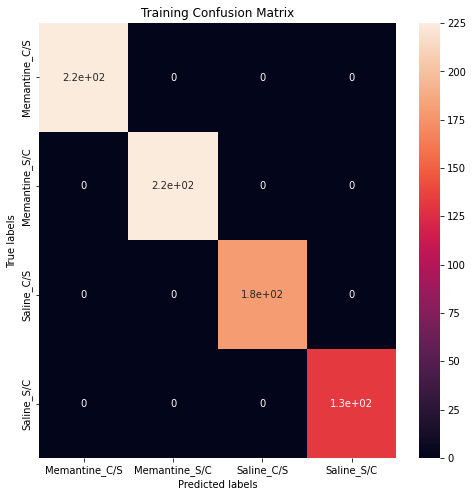

In [ ]:
plt.figure(figsize = (8,8))
cm_RF_SVM = confusion_matrix(y_train_multiclass , y_predicted_RF_multiclass)
ax=plt.subplot()
sns.heatmap(cm_RF_SVM , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])
ax.yaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])

Question 6 : Feature_Importance, Here Permutation feature importance has been used.

Linear_SVM_Binary_class_classification

In [ ]:
result_Linear_SVM = permutation_importance( Linear_SVM , training_features, y_train, n_repeats=5, random_state=0) ## n_parameters is the number of times, the data will be shuffled and returns the importance score

In [ ]:
mean_importance_different_features_Linear_SVM = result_Linear_SVM.importances_mean
print('Importance of different features are : ' , mean_importance_different_features_Linear_SVM)

Importance of different features are :  [0.00524934 0.00787402 0.02152231 0.00052493 0.01259843 0.00104987
 0.01627297 0.00446194 0.00026247 0.         0.00708661 0.
 0.00944882 0.00997375 0.01259843 0.00131234 0.         0.00104987
 0.         0.0183727  0.03963255 0.         0.         0.00183727
 0.0648294  0.00734908 0.23254593 0.00393701 0.00131234 0.02440945
 0.00367454 0.0007874  0.0191601  0.02257218 0.00839895 0.01207349
 0.0023622  0.03989501 0.00839895 0.01574803 0.00787402 0.0007874
 0.02729659 0.         0.00026247 0.00498688 0.0023622  0.
 0.00183727 0.         0.01732283 0.00446194 0.00131234 0.
 0.06141732 0.         0.01338583 0.00209974 0.01968504 0.0023622
 0.00629921 0.0175853  0.00656168 0.         0.00052493 0.02204724
 0.00551181]


<BarContainer object of 67 artists>

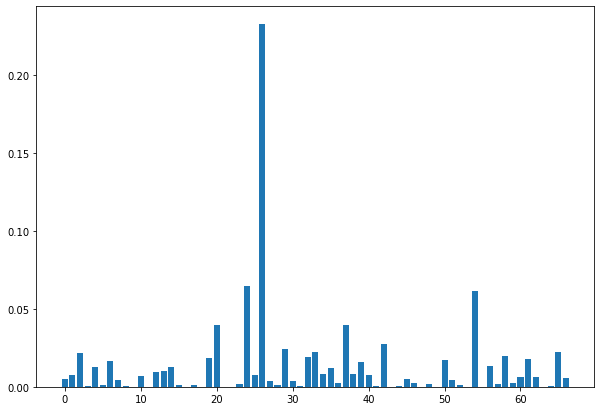

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(np.arange(0, len(mean_importance_different_features_Linear_SVM) , 1), mean_importance_different_features_Linear_SVM)  ## gives the bar plot of feature importance values along the number of features in X-axis for Linear SVM

In [ ]:
optimal_features_Linear_SVM = []         ## This will store the names of the most important features using permutation feature importance
optimal_index1 = np.argsort(mean_importance_different_features_Linear_SVM)[-20 : ]     ## 20 most important features have been taken, RFECV also gives number of optimal features is 20 , this variable gives the index values of 20 most important features
for i in range(len(optimal_index1)):
  optimal_features_Linear_SVM.append(training_features.columns[optimal_index1[i]])
print('optimal features for Linear SVM are : ' , optimal_features_Linear_SVM)

optimal features for Linear SVM are :  ['pAKT_N', 'pPKCAB_N', 'IL1B_N', 'NUMB_N', 'pCAMKII_N', 'ERBB4_N', 'Ubiquitin_N', 'ELK_N', 'DSCR1_N', 'pCASP9_N', 'NR1_N', 'SYP_N', 'AMPKA_N', 'MTOR_N', 'pPKCG_N', 'ERK_N', 'TIAM1_N', 'GluR3_N', 'TRKA_N', 'APP_N']


RBF SVM binary class classification

In [ ]:
result_RBF_SVM = permutation_importance( RBF_SVM , training_features, y_train, n_repeats=5, random_state=0)

In [ ]:
mean_importance_different_features_RBF_SVM = result_RBF_SVM.importances_mean
print('Importance of different features are : ' , mean_importance_different_features_RBF_SVM)

Importance of different features are :  [ 1.83727034e-03  5.24934383e-04  4.72440945e-03 -7.87401575e-04
  2.88713911e-03 -1.04986877e-03  2.09973753e-03 -2.09973753e-03
 -5.24934383e-04  0.00000000e+00  2.09973753e-03 -1.57480315e-03
 -2.09973753e-03 -7.87401575e-04 -2.09973753e-03 -1.83727034e-03
  0.00000000e+00  0.00000000e+00 -7.87401575e-04  6.56167979e-03
  4.40944882e-02 -1.31233596e-03  0.00000000e+00  7.87401575e-04
  5.24934383e-02 -1.83727034e-03  2.20209974e-01 -7.87401575e-04
  0.00000000e+00  1.31233596e-02 -2.62467192e-04 -2.62467192e-04
  6.03674541e-03  1.81102362e-02  1.04986877e-03  2.88713911e-03
 -7.87401575e-04  2.78215223e-02  7.87401575e-04  7.87401575e-04
  2.62467192e-04 -7.87401575e-04  3.67454068e-03  0.00000000e+00
 -5.24934383e-04 -2.36220472e-03 -4.44089210e-17  0.00000000e+00
 -1.57480315e-03 -7.87401575e-04  2.62467192e-03 -1.83727034e-03
 -1.57480315e-03  0.00000000e+00  5.19685039e-02 -5.24934383e-04
  1.83727034e-03  1.04986877e-03  1.04986877e-02  

<BarContainer object of 67 artists>

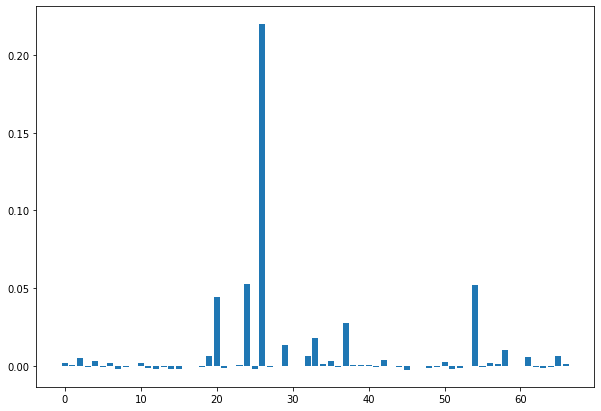

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(np.arange(0, len(mean_importance_different_features_RBF_SVM) , 1), mean_importance_different_features_RBF_SVM) ## gives the bar plot of feature importance values along the number of features in X-axis for RBF SVM

In [ ]:
optimal_features_RBF_SVM = []
optimal_index2 = np.argsort(mean_importance_different_features_RBF_SVM)[-5 : ]      ## 5 most important features have been taken,  this variable gives the index values of 5 most important features
for i in range(len(optimal_index2)):
  optimal_features_RBF_SVM.append(training_features.columns[optimal_index2[i]])
print('optimal features for RBF SVM are : ' , optimal_features_RBF_SVM)

optimal features for RBF SVM are :  ['TIAM1_N', 'ERK_N', 'GluR3_N', 'TRKA_N', 'APP_N']


Neural Network Binary class classification

In [ ]:
result_NN = permutation_importance( NN , training_features, y_train, n_repeats=5, random_state=0)

In [ ]:
mean_importance_different_features_NN = result_NN.importances_mean
print('Importance of different features are : ' , mean_importance_different_features_NN)

Importance of different features are :  [0.0015748  0.00026247 0.0007874  0.         0.0023622  0.
 0.00183727 0.00052493 0.         0.         0.00262467 0.
 0.         0.         0.00209974 0.         0.         0.
 0.         0.00131234 0.01574803 0.         0.         0.
 0.02992126 0.00052493 0.13149606 0.         0.         0.01732283
 0.         0.         0.00787402 0.0015748  0.         0.0007874
 0.00026247 0.02545932 0.         0.         0.0023622  0.
 0.00131234 0.         0.         0.00131234 0.00052493 0.
 0.         0.         0.00104987 0.00026247 0.         0.
 0.02887139 0.         0.00551181 0.         0.0191601  0.00052493
 0.00026247 0.00026247 0.         0.         0.         0.01417323
 0.00682415]


<BarContainer object of 67 artists>

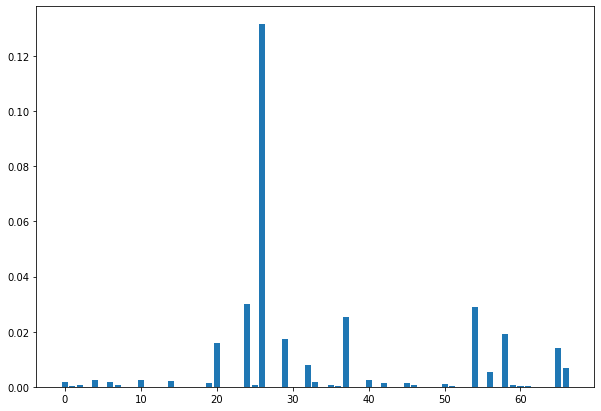

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(np.arange(0, len(mean_importance_different_features_NN) , 1), mean_importance_different_features_NN)  ## gives the bar plot of feature importance values along the number of features in X-axis for Neural Network

In [ ]:
optimal_features_NN = []
optimal_index3 = np.argsort(mean_importance_different_features_NN)[-5 : ]       ## 5 most important features have been taken,  this variable gives the index values of 5 most important features
for i in range(len(optimal_index3)):
  optimal_features_NN.append(training_features.columns[optimal_index3[i]])
print('optimal features for NN are : ' , optimal_features_NN)

optimal features for NN are :  ['pCASP9_N', 'TIAM1_N', 'GluR3_N', 'TRKA_N', 'APP_N']


Random Forest Binary Class classification

In [ ]:
result_RF = permutation_importance( RF , training_features, y_train, n_repeats=5, random_state=0)

In [ ]:
mean_importance_different_features_RF = result_RF.importances_mean
print('Importance of different features are : ' , mean_importance_different_features_RF)

Importance of different features are :  [ 5.24934383e-04 -1.57480315e-03 -5.24934383e-04  2.36220472e-03
 -2.62467192e-04  0.00000000e+00  1.04986877e-03  0.00000000e+00
  0.00000000e+00  1.04986877e-03  0.00000000e+00  2.62467192e-04
  0.00000000e+00  1.31233596e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.04986877e-03  2.62467192e-03  5.24934383e-03
 -2.36220472e-03  1.04986877e-03  7.87401575e-04  0.00000000e+00
  7.87401575e-04  7.87401575e-04  2.92650919e-01  7.87401575e-04
  3.14960630e-03  2.62467192e-03  0.00000000e+00  7.87401575e-04
 -1.04986877e-03  5.27559055e-02  1.65354331e-02  1.15485564e-02
  0.00000000e+00  2.62467192e-04  0.00000000e+00  4.46194226e-03
  0.00000000e+00  1.31233596e-03  1.39107612e-02  1.31233596e-03
  3.93700787e-03  3.14960630e-03  4.72440945e-03  7.87401575e-04
  3.67454068e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.62467192e-03  2.36220472e-03  1.41732283e-02  0.00000000e+00
  0.00000000e+00  1.31233596e-03  3.14960630e-03  

<BarContainer object of 67 artists>

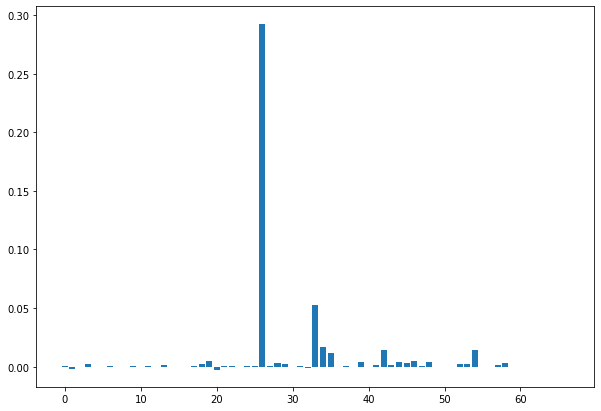

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(np.arange(0, len(mean_importance_different_features_RF) , 1), mean_importance_different_features_RF)  ## gives the bar plot of feature importance values along the number of features in X-axis for Random Forest

In [ ]:
optimal_features_RF = []
optimal_index4 = np.argsort(mean_importance_different_features_RF)[-1 : ]    ##  most important feature has been taken, RFECV also gives number of optimal feature is 1 , this variable gives the index values of most important feature
for i in range(len(optimal_index4)):
  optimal_features_RF.append(training_features.columns[optimal_index4[i]])
print('optimal features for Random Forest are : ' , optimal_features_RF)

optimal features for Random Forest are :  ['APP_N']


Linear SVM multiclass classification

In [ ]:
result_Linear_SVM_multiclass = permutation_importance( Linear_SVM_multiclass , training_features, y_train_multiclass, n_repeats=5, random_state=0)

In [ ]:
mean_importance_different_features_Linear_SVM_multiclass = result_Linear_SVM_multiclass.importances_mean
print('Importance of different features are : ' , mean_importance_different_features_Linear_SVM_multiclass)

Importance of different features are :  [0.00603675 0.00209974 0.00682415 0.03858268 0.0007874  0.00682415
 0.10918635 0.00761155 0.00262467 0.00104987 0.0023622  0.
 0.00419948 0.00262467 0.06325459 0.0007874  0.00708661 0.02808399
 0.00131234 0.00393701 0.03700787 0.01286089 0.         0.00446194
 0.02125984 0.00629921 0.03385827 0.01364829 0.02650919 0.00209974
 0.00209974 0.00288714 0.00997375 0.00026247 0.         0.01889764
 0.00393701 0.0023622  0.00131234 0.00603675 0.00734908 0.0007874
 0.00839895 0.00577428 0.03044619 0.         0.0015748  0.00052493
 0.00288714 0.         0.00104987 0.03490814 0.00052493 0.0023622
 0.00183727 0.00052493 0.02204724 0.0007874  0.02257218 0.
 0.0023622  0.03490814 0.04461942 0.00052493 0.00026247 0.00104987
 0.03884514]


<BarContainer object of 67 artists>

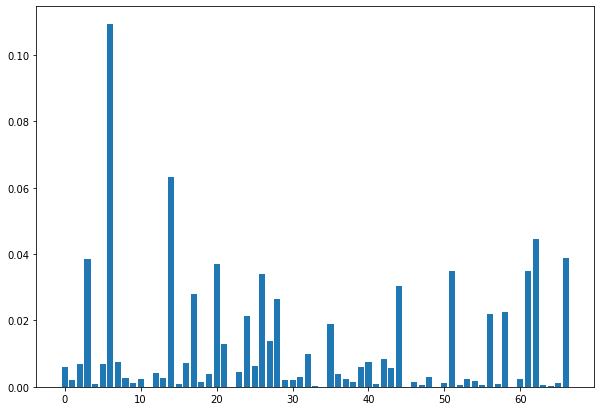

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(np.arange(0, len(mean_importance_different_features_Linear_SVM_multiclass) , 1), mean_importance_different_features_Linear_SVM_multiclass)  ## gives the bar plot of feature importance values along the number of features in X-axis for Linear SVM

In [ ]:
optimal_features_Linear_SVM_multiclass = []
optimal_index5 = np.argsort(mean_importance_different_features_Linear_SVM_multiclass)[-33 : ]   ##  most important 33 features have been taken, RFECV also gives number of optimal feature is 33 , this variable gives the index values of 33 most important features
for i in range(len(optimal_index5)):
  optimal_features_Linear_SVM_multiclass.append(training_features.columns[optimal_index5[i]])
print('optimal features for Linear_SVM_multiclass are : ' , optimal_features_Linear_SVM_multiclass)

optimal features for Linear_SVM_multiclass are :  ['RAPTOR_N', 'ELK_N', 'pNR2A_N', 'MEK_N', 'CDK5_N', 'DYRK1A_N', 'NUMB_N', 'RSK_N', 'NR1_N', 'pBRAF_N', 'AKT_N', 'P70S6_N', 'pCREB_N', 'pPKCG_N', 'DSCR1_N', 'GSK3B_N', 'Bcatenin_N', 'pNUMB_N', 'TRKA_N', 'IL1B_N', 'pCASP9_N', 'SOD1_N', 'CAMKII_N', 'S6_N', 'APP_N', 'Ubiquitin_N', 'nNOS_N', 'ERK_N', 'NR2A_N', 'CaNA_N', 'pGSK3B_Tyr216_N', 'pPKCAB_N', 'pCAMKII_N']


SVM with RBF kernel for multiclass classification

In [ ]:
result_RBF_SVM_multiclass = permutation_importance( RBF_SVM_multiclass , training_features, y_train_multiclass, n_repeats=5, random_state=0)

In [ ]:
mean_importance_different_features_RBF_SVM_multiclass = result_RBF_SVM_multiclass.importances_mean
print('Importance of different features are : ' , mean_importance_different_features_RBF_SVM_multiclass)

Importance of different features are :  [0.0007874  0.00577428 0.00209974 0.01259843 0.         0.0007874
 0.09737533 0.00524934 0.         0.00209974 0.00104987 0.
 0.00314961 0.00183727 0.05406824 0.         0.00262467 0.02257218
 0.         0.00314961 0.01233596 0.00183727 0.         0.00524934
 0.01154856 0.00498688 0.02388451 0.00393701 0.02125984 0.00341207
 0.00209974 0.00104987 0.00419948 0.         0.         0.0144357
 0.00209974 0.00367454 0.00026247 0.00892388 0.00866142 0.
 0.01076115 0.00446194 0.02152231 0.00183727 0.         0.
 0.0023622  0.         0.00131234 0.02860892 0.00262467 0.00209974
 0.00419948 0.         0.01732283 0.00026247 0.01784777 0.
 0.00577428 0.03254593 0.02020997 0.00104987 0.         0.00026247
 0.02309711]


<BarContainer object of 67 artists>

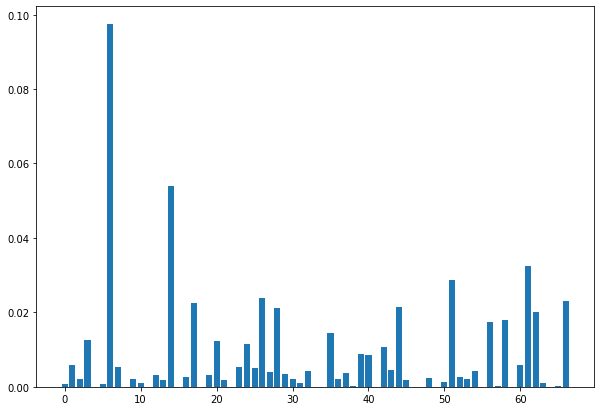

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(np.arange(0, len(mean_importance_different_features_RBF_SVM_multiclass) , 1), mean_importance_different_features_RBF_SVM_multiclass)  ## gives the bar plot of feature importance values along the number of features in X-axis for RBF SVM

In [ ]:
optimal_features_RBF_SVM_multiclass = []
optimal_index6 = np.argsort(mean_importance_different_features_RBF_SVM_multiclass)[-20 : ]  ##  most important 20 features have been taken, this variable gives the index values of 20 most important features
for i in range(len(optimal_index6)):
  optimal_features_RBF_SVM_multiclass.append(training_features.columns[optimal_index6[i]])
print('optimal features for RBF_SVM_multiclass are : ' , optimal_features_RBF_SVM_multiclass)

optimal features for RBF_SVM_multiclass are :  ['BDNF_N', 'P70S6_N', 'NUMB_N', 'pPKCG_N', 'TRKA_N', 'ERK_N', 'NR2A_N', 'pNUMB_N', 'IL1B_N', 'pCASP9_N', 'pGSK3B_Tyr216_N', 'SOD1_N', 'S6_N', 'CAMKII_N', 'CaNA_N', 'APP_N', 'nNOS_N', 'Ubiquitin_N', 'pPKCAB_N', 'pCAMKII_N']


Neural Network for multiclass classification

In [ ]:
result_NN_multiclass = permutation_importance( NN_multiclass , training_features, y_train_multiclass, n_repeats=5, random_state=0)

In [ ]:
mean_importance_different_features_NN_multiclass = result_NN_multiclass.importances_mean
print('Importance of different features are : ' , mean_importance_different_features_NN_multiclass)

Importance of different features are :  [0.00446194 0.02677165 0.00183727 0.01994751 0.         0.0007874
 0.16902887 0.00787402 0.00262467 0.00866142 0.01049869 0.
 0.00183727 0.00026247 0.1175853  0.0007874  0.00577428 0.0312336
 0.         0.00026247 0.05223097 0.00918635 0.         0.00446194
 0.01076115 0.00629921 0.04278215 0.00367454 0.03333333 0.
 0.00367454 0.         0.00393701 0.00131234 0.         0.01942257
 0.00209974 0.00577428 0.         0.00577428 0.00367454 0.00314961
 0.00393701 0.00026247 0.05538058 0.         0.00104987 0.00026247
 0.0015748  0.00183727 0.         0.03832021 0.00026247 0.01154856
 0.00629921 0.         0.03228346 0.0023622  0.03674541 0.00131234
 0.00524934 0.05538058 0.03595801 0.         0.         0.
 0.14671916]


<BarContainer object of 67 artists>

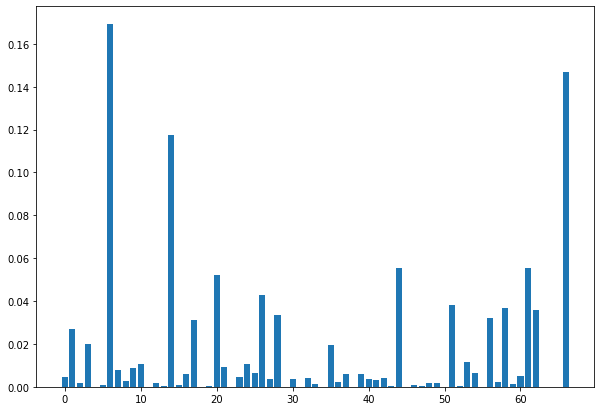

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(np.arange(0, len(mean_importance_different_features_NN_multiclass) , 1), mean_importance_different_features_NN_multiclass)    ## gives the bar plot of feature importance values along the number of features in X-axis for Neural Network

In [ ]:
optimal_features_NN_multiclass = []
optimal_index7 = np.argsort(mean_importance_different_features_NN_multiclass)[-25 : ]       ##  most important 25 features have been taken, this variable gives the index values of 25 most important features
for i in range(len(optimal_index7)):
  optimal_features_NN_multiclass.append(training_features.columns[optimal_index7[i]])
print('optimal features for NN_multiclass are : ' , optimal_features_NN_multiclass)

optimal features for NN_multiclass are :  ['NUMB_N', 'RSK_N', 'GluR3_N', 'pCREB_N', 'pJNK_N', 'GSK3B_N', 'PKCA_N', 'TRKA_N', 'GFAP_N', 'pNUMB_N', 'NR2A_N', 'BDNF_N', 'CAMKII_N', 'IL1B_N', 'SOD1_N', 'pGSK3B_Tyr216_N', 'pCASP9_N', 'nNOS_N', 'APP_N', 'ERK_N', 'S6_N', 'Ubiquitin_N', 'pPKCAB_N', 'CaNA_N', 'pCAMKII_N']


Random Forest for multiclass classification

In [ ]:
result_RF_multiclass = permutation_importance( RF_multiclass , training_features, y_train_multiclass, n_repeats=5, random_state=0)

In [ ]:
mean_importance_different_features_RF_multiclass = result_RF_multiclass.importances_mean
print('Importance of different features are : ' , mean_importance_different_features_RF_multiclass)

Importance of different features are :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00052493 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


<BarContainer object of 67 artists>

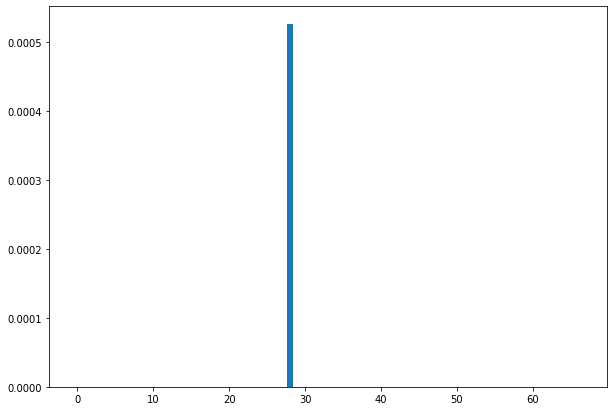

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(np.arange(0, len(mean_importance_different_features_RF_multiclass) , 1), mean_importance_different_features_RF_multiclass)        ## gives the bar plot of feature importance values along the number of features in X-axis for Random Forest

In [ ]:
optimal_features_RF_multiclass = []
optimal_index8 = np.argsort(mean_importance_different_features_RF_multiclass)[-1 : ]          ##  most important feature has been taken, RFECV also gives number of optimal feature is 1 , this variable gives the index values of most important feature
for i in range(len(optimal_index8)):
  optimal_features_RF_multiclass.append(training_features.columns[optimal_index8[i]])     
print('optimal features for RF_multiclass are : ' , optimal_features_RF_multiclass)

optimal features for RF_multiclass are :  ['CaNA_N']


Question 7 : Feature Elimination using Recursive Feature Elimination

Linear_SVM Feature Selection

In [ ]:
Linear_SVM_selector = RFECV(Linear_SVM, step=1, cv=5)     ## 5 cross-validation has been used and in one time only one feature will be eliminated
Linear_SVM_selector = Linear_SVM_selector.fit(training_features , y_train)
Linear_SVM_feature_ranking = list(Linear_SVM_selector.ranking_)

In [ ]:
np.array(Linear_SVM_feature_ranking)                   ## gives the ranking of diffrent features

array([ 8,  1,  1, 25,  5, 18, 13, 30, 26, 43, 21, 34,  2,  1,  3,  6, 44,
       31, 47,  1,  1, 45, 42, 33,  1, 14,  1, 19, 27,  1, 12, 29,  1,  1,
        1,  1, 24,  1, 11,  1,  1, 32,  1, 46, 39, 15,  7, 38, 28, 40,  1,
       22, 20, 48,  1, 36,  4, 10,  1, 17, 23,  9, 16, 37, 41,  1, 35])

In [ ]:
print('accuracy with eliminating 1-feature at each step : ' , Linear_SVM_selector.cv_results_['mean_test_score'])
print('best cross-validation accuracy score with optimal number of features : ' , max(Linear_SVM_selector.cv_results_['mean_test_score']))

accuracy with eliminating 1-feature at each step :  [0.74014448 0.78596491 0.7873495  0.78860509 0.76488648 0.80565015
 0.8253354  0.79394565 0.80439456 0.81620227 0.81094771 0.80699174
 0.80438596 0.79782422 0.80175439 0.81358789 0.81095631 0.82148263
 0.82935157 0.83067595 0.81754386 0.81886825 0.80573615 0.81362229
 0.80704334 0.81360509 0.81622807 0.8122721  0.81623667 0.82146543
 0.82145683 0.81884245 0.80964912 0.81358789 0.81881665 0.81093911
 0.80569315 0.8004558  0.80306158 0.79782422 0.79126247 0.8004558
 0.79782422 0.79519264 0.79912281 0.79256106 0.78993808 0.78993808
 0.7873323  0.78994668 0.78601651 0.78338493 0.78600791 0.79126247
 0.79126247 0.78865669 0.78995528 0.7873495  0.78603371 0.7873495
 0.79128827 0.78997248 0.78997248 0.78865669 0.78996388 0.79127107
 0.79127107]
best cross-validation accuracy score with optimal number of features :  0.8306759545923633


In [ ]:
print('number of important features using RFECV are : ' , Linear_SVM_selector.n_features_)
most_important_features_Linear_SVM = []
for i in range(len(training_features.columns)):                ## i iterates through the number of training features
  if Linear_SVM_selector.support_[i] :
    most_important_features_Linear_SVM.append(training_features.columns[i])
print('optimal features using RFECV are : ' , most_important_features_Linear_SVM)

number of important features using RFECV are :  20
optimal features using RFECV are :  ['BDNF_N', 'NR1_N', 'pNR2B_N', 'ELK_N', 'ERK_N', 'TRKA_N', 'APP_N', 'MTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'TIAM1_N', 'NUMB_N', 'P70S6_N', 'pPKCG_N', 'ERBB4_N', 'GluR3_N', 'pCASP9_N', 'SYP_N']


This code block is written based on eliminating least 10 important features according to the feature ranking in each iteration and stores the cross-validation score after elinating 10 features in each iteration step 

In [ ]:
number_of_iterations = int(input('How many times classifier will be trained on different number of features : '))
number_of_features_removed_after_each_iteration = int(input('How many features remove after each iteration : '))
accuracy_score_after_each_iteration = []
removed_features_after_each_iteration = [ [] for _ in range( number_of_iterations)]
important_features = [ [] for _ in range( number_of_iterations)]
remaining_features_after_each_iteration = training_features
for i in range(number_of_iterations):                                                                                               ## i iterates through the iteration number
  removed_features_index = np.argsort(np.array(Linear_SVM_feature_ranking))[-number_of_features_removed_after_each_iteration : ]    ## gives the removed features index in each iteration
  removed_features_rankings = [Linear_SVM_feature_ranking[k] for k in removed_features_index]                                       ## stores the removed features ranking after the iteration
  for j in range(number_of_features_removed_after_each_iteration):                                                                  ## j iterates throught the number of removing features
    removed_features_after_each_iteration[i].append(remaining_features_after_each_iteration.columns[removed_features_index[j]])
    Linear_SVM_feature_ranking.remove(removed_features_rankings[j])
  remaining_features_after_each_iteration = remaining_features_after_each_iteration.drop(removed_features_after_each_iteration[i] , axis = 1)      ## remove the 10 least important features from the dataframe
  important_features[i].append(remaining_features_after_each_iteration.columns)                                                    ## this variable stores all the remaining features after a iteration
  Linear_SVM_result1 , best_parameter_linear_SVM1 , best_score_linear_SVM1 = Linear_SVM(remaining_features_after_each_iteration, y_train)
  accuracy_score_after_each_iteration.append(best_score_linear_SVM1)                                                               ## stores the best cross-validation accuracy score after eliminating 10 features in each iteration

How many times classifier will be trained on different number of features : 6
How many features remove after each iteration : 10


In [ ]:
accuracy_score_after_each_iteration

[0.8201238390092879,
 0.8490196078431372,
 0.8687134502923977,
 0.8883900928792569,
 0.8622291021671826,
 0.6563295493636051]

Random Forest Feature Selection

In [ ]:
RF_selector = RFECV(RF, step=1, cv=5 , importance_getter='auto')
RF_selector = RF_selector.fit(training_features , y_train)   ## fit on training features and training labels with 5 cross-validation
RF_feature_ranking = list(RF_selector.ranking_)

In [ ]:
np.array(RF_feature_ranking)                                ## shows the features ranking by using Random Forest

array([25, 20, 10, 29, 11, 41, 48, 42, 35, 33, 59, 61, 52, 54, 26, 51, 60,
       19, 22,  7, 14, 23, 40, 62, 24, 57,  1, 49, 12,  5, 34, 17, 21,  2,
        4,  8, 58, 39, 38, 32, 47, 30,  6, 67, 18, 13, 27, 46, 15, 43, 31,
       56,  9, 16,  3, 45, 64, 50, 36, 53, 44, 55, 63, 37, 66, 28, 65])

In [ ]:
print('accuracy with eliminating 1-feature at each step : ' , RF_selector.cv_results_['mean_test_score'])
print('best cross-validation accuracy score with optimal number of features : ' , max(RF_selector.cv_results_['mean_test_score']))

accuracy with eliminating 1-feature at each step :  [0.72841417 0.71395769 0.68644651 0.674656   0.67726178 0.66682147
 0.6747076  0.67210182 0.69167527 0.70612315 0.70214998 0.71786206
 0.69821121 0.69430685 0.69299106 0.71528208 0.72571379 0.6877279
 0.70208118 0.70606295 0.69816821 0.69029068 0.69426385 0.69297386
 0.69298246 0.6877193  0.69296526 0.69562264 0.6995528  0.6995012
 0.70216718 0.69691262 0.7126333  0.69556244 0.70471276 0.68114895
 0.69821121 0.69296526 0.69559684 0.70087719 0.69164087 0.70739594
 0.70342277 0.69557964 0.69431545 0.71394909 0.70344857 0.69294806
 0.71129171 0.69427245 0.699527   0.71001032 0.70477296 0.69689542
 0.70084279 0.68903509 0.69428965 0.71919505 0.70216718 0.69821121
 0.70601995 0.70872893 0.70735294 0.71527348 0.69823701 0.69563123
 0.71001032]
best cross-validation accuracy score with optimal number of features :  0.7284141726866185


In [ ]:
print('number of important features using RFECV are : ' , RF_selector.n_features_)
most_important_features_RF = []
for i in range(len(training_features.columns)):
  if RF_selector.support_[i] :
    most_important_features_RF.append(training_features.columns[i])
print('optimal features using RFECV are : ' , most_important_features_RF)

number of important features using RFECV are :  1
optimal features using RFECV are :  ['APP_N']


This code block is written based on eliminating least 10 important features according to the feature ranking in each iteration and stores the cross-validation score after elinating 10 features in each iteration step ...The same procedure has been followed up like Linear SVM

In [ ]:
accuracy_score_after_each_iteration = []
removed_features_after_each_iteration = [ [] for _ in range( number_of_iterations)]
important_features = [ [] for _ in range( number_of_iterations)]
remaining_features_after_each_iteration = training_features
for i in range(number_of_iterations):
  removed_features_index = np.argsort(np.array(RF_feature_ranking))[-number_of_features_removed_after_each_iteration : ]
  removed_features_rankings = [RF_feature_ranking[k] for k in removed_features_index]
  for j in range(number_of_features_removed_after_each_iteration):
    removed_features_after_each_iteration[i].append(remaining_features_after_each_iteration.columns[removed_features_index[j]])
    RF_feature_ranking.remove(removed_features_rankings[j])
  remaining_features_after_each_iteration = remaining_features_after_each_iteration.drop(removed_features_after_each_iteration[i] , axis = 1)
  important_features[i].append(remaining_features_after_each_iteration.columns)
  RF_result1 , best_parameter_RF1 , best_score_RF1 = Random_Forest(remaining_features_after_each_iteration, y_train)
  accuracy_score_after_each_iteration.append(best_score_RF1)

In [ ]:
accuracy_score_after_each_iteration

[0.7112831097351221,
 0.7048073615411077,
 0.7204764361885105,
 0.7440832473340213,
 0.7782937736498108,
 0.7952184382524939]

Linear SVM multiclass feature selection

In [ ]:
Linear_SVM_multiclass_selector = RFECV(Linear_SVM_multiclass, step=1, cv=5 , importance_getter='auto')
Linear_SVM_multiclass_selector = Linear_SVM_multiclass_selector.fit(training_features , y_train_multiclass)  ## fit on training features and training labels with 5 cross-validation
Linear_SVM_multiclass_feature_ranking = list(Linear_SVM_multiclass_selector.ranking_)

In [ ]:
np.array(Linear_SVM_multiclass_feature_ranking)     ## gives the feature ranking of diffrent features for Linear_SVM_multiclass model

array([ 3, 15,  9,  1, 27,  4,  1, 10,  1,  1, 18, 32,  1,  8,  1, 28,  1,
        1, 14, 21,  1,  1, 31, 12,  1,  1,  1,  1,  1,  1,  1,  7,  1, 30,
       34,  1, 16,  1, 19,  1,  1, 22,  1, 11,  1, 20, 23,  6,  1, 17, 35,
        1,  1,  1,  1, 25,  5,  1,  2, 29, 13,  1,  1, 24, 33, 26,  1])

In [ ]:
print('accuracy with eliminating 1-feature at each step : ' , Linear_SVM_multiclass_selector.cv_results_['mean_test_score'])
print('best cross-validation accuracy score with optimal number of features : ' , max(Linear_SVM_multiclass_selector.cv_results_['mean_test_score']))

accuracy with eliminating 1-feature at each step :  [0.549871   0.59052288 0.59443584 0.64420365 0.68894049 0.66125731
 0.66648607 0.67174063 0.67699518 0.68097695 0.69673203 0.69672343
 0.7256192  0.71906605 0.73089955 0.74797902 0.74011008 0.73480392
 0.7374527  0.73356553 0.75326797 0.75589955 0.7624871  0.76776746
 0.76122291 0.75989852 0.76381149 0.76908325 0.76117991 0.76641727
 0.76774166 0.77431201 0.78089955 0.76903165 0.7756192  0.76508428
 0.76900585 0.75590815 0.75986412 0.7625215  0.76382009 0.77170623
 0.77170623 0.77169763 0.77036464 0.76644307 0.76511008 0.77037324
 0.76642587 0.76642587 0.7624871  0.76511868 0.77038184 0.75985552
 0.76380289 0.76380289 0.76771586 0.75724974 0.75855693 0.76513588
 0.76513588 0.76775026 0.76775886 0.76645167 0.76382869 0.76514448
 0.76645167]
best cross-validation accuracy score with optimal number of features :  0.7808995528035776


In [ ]:
print('number of important features using RFECV are : ' , Linear_SVM_multiclass_selector.n_features_)
most_important_features_Linear_SVM_multiclass = []
for i in range(len(training_features.columns)):
  if Linear_SVM_multiclass_selector.support_[i] :
    most_important_features_Linear_SVM_multiclass.append(training_features.columns[i])
print('optimal features using RFECV are : ' , most_important_features_Linear_SVM_multiclass)

number of important features using RFECV are :  33
optimal features using RFECV are :  ['NR2A_N', 'pCAMKII_N', 'pELK_N', 'pJNK_N', 'pNR2A_N', 'pPKCAB_N', 'AKT_N', 'CAMKII_N', 'ERK_N', 'GSK3B_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'DSCR1_N', 'pNUMB_N', 'TIAM1_N', 'NUMB_N', 'P70S6_N', 'pPKCG_N', 'S6_N', 'BAX_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'P3525_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'CaNA_N']


This code block is written based on eliminating least 10 important features according to the feature ranking in each iteration and stores the cross-validation score after elinating 10 features in each iteration step ...The same procedure has been followed up like Linear SVM

In [ ]:
accuracy_score_after_each_iteration = []
removed_features_after_each_iteration = [ [] for _ in range( number_of_iterations)]
important_features = [ [] for _ in range( number_of_iterations)]
remaining_features_after_each_iteration = training_features
for i in range(number_of_iterations):
  removed_features_index = np.argsort(np.array(Linear_SVM_multiclass_feature_ranking))[-number_of_features_removed_after_each_iteration : ]
  removed_features_rankings = [Linear_SVM_multiclass_feature_ranking[k] for k in removed_features_index]
  for j in range(number_of_features_removed_after_each_iteration):
    removed_features_after_each_iteration[i].append(remaining_features_after_each_iteration.columns[removed_features_index[j]])
    Linear_SVM_multiclass_feature_ranking.remove(removed_features_rankings[j])
  remaining_features_after_each_iteration = remaining_features_after_each_iteration.drop(removed_features_after_each_iteration[i] , axis = 1)
  important_features[i].append(remaining_features_after_each_iteration.columns)
  Linear_SVM_multiclass_result1 , best_parameter_linear_SVM1_multiclass , best_score_linear_SVM1_multiclass = Linear_SVM(remaining_features_after_each_iteration, y_train_multiclass)
  accuracy_score_after_each_iteration.append(best_score_linear_SVM1_multiclass)

In [ ]:
accuracy_score_after_each_iteration

[0.7873925008599931,
 0.8044805641554869,
 0.8294805641554868,
 0.8241830065359478,
 0.7308393532851738,
 0.39754901960784317]

Random Forest multiclass feature selection

In [ ]:
RF_multiclass_selector = RFECV(RF_multiclass, step=1, cv=5 )
RF_multiclass_selector = RF_multiclass_selector.fit(training_features , y_train_multiclass)        ## fit on training features and training labels with 5 cross-validation
RF_multiclass_feature_ranking = list(RF_multiclass_selector.ranking_)

In [ ]:
np.array(RF_multiclass_feature_ranking)                                ## gives the feature ranking of diffrent features for RF_multiclass model

array([ 1, 27, 24, 30,  1, 13,  1, 22,  1,  1,  7,  3,  5, 31,  1,  2,  8,
       17, 35,  1, 32,  1, 23, 20, 33, 29, 12, 26,  1, 15,  1,  1,  1, 25,
       11,  1, 16, 21,  1,  1,  4,  1,  1,  1,  1, 28,  1,  1,  1,  1, 19,
        1,  1,  1,  1, 14,  1,  6, 10,  1,  1,  1,  9, 18, 34,  1,  1])

In [ ]:
print('accuracy with eliminating 1-feature at each step : ' , RF_multiclass_selector.cv_results_['mean_test_score'])
print('best cross-validation accuracy score with optimal number of features : ' , max(RF_multiclass_selector.cv_results_['mean_test_score']))

accuracy with eliminating 1-feature at each step :  [0.4999656  0.60621775 0.54863261 0.55651015 0.59449604 0.60633815
 0.63907809 0.65486756 0.6378397  0.64559684 0.64036808 0.64693842
 0.63905229 0.63252494 0.62071723 0.62994496 0.63906089 0.62859477
 0.6495786  0.64957    0.64432405 0.66800826 0.65485036 0.65482456
 0.65478156 0.67187822 0.65480736 0.66793086 0.65345717 0.66532508
 0.66135191 0.67197282 0.69283626 0.66792226 0.66400069 0.6745098
 0.6627021  0.65883213 0.66140351 0.67979016 0.67192122 0.67850017
 0.65614895 0.67584279 0.6627107  0.65085999 0.67977296 0.65873753
 0.66928965 0.66660647 0.66400929 0.66400929 0.6496044  0.67192982
 0.67192982 0.66407809 0.67978156 0.65747334 0.66928105 0.65749054
 0.65225318 0.67064843 0.67062264 0.66140351 0.64564843 0.65091159
 0.66797386]
best cross-validation accuracy score with optimal number of features :  0.6928362573099415


In [ ]:
print('number of important features using RFECV are : ' , RF_multiclass_selector.n_features_)
most_important_features_RF_multiclass = []
for i in range(len(training_features.columns)):
  if RF_multiclass_selector.support_[i] :
    most_important_features_RF_multiclass.append(training_features.columns[i])
print('optimal features using RFECV are : ' , most_important_features_RF_multiclass)

number of important features using RFECV are :  33
optimal features using RFECV are :  ['DYRK1A_N', 'pAKT_N', 'pCAMKII_N', 'pELK_N', 'pJNK_N', 'pPKCAB_N', 'ELK_N', 'GSK3B_N', 'SOD1_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'pNUMB_N', 'pP70S6_N', 'NUMB_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'IL1B_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'SYP_N', 'CaNA_N']


This code block is written based on eliminating least 10 important features according to the feature ranking in each iteration and stores the cross-validation score after elinating 10 features in each iteration step ...

In [ ]:
accuracy_score_after_each_iteration = []
removed_features_after_each_iteration = [ [] for _ in range( number_of_iterations)]
important_features = [ [] for _ in range( number_of_iterations)]
remaining_features_after_each_iteration = training_features
for i in range(number_of_iterations):
  removed_features_index = np.argsort(np.array(RF_multiclass_feature_ranking))[-number_of_features_removed_after_each_iteration : ]
  removed_features_rankings = [RF_multiclass_feature_ranking[k] for k in removed_features_index]
  for j in range(number_of_features_removed_after_each_iteration):
    removed_features_after_each_iteration[i].append(remaining_features_after_each_iteration.columns[removed_features_index[j]])
    RF_multiclass_feature_ranking.remove(removed_features_rankings[j])
  remaining_features_after_each_iteration = remaining_features_after_each_iteration.drop(removed_features_after_each_iteration[i] , axis = 1)
  important_features[i].append(remaining_features_after_each_iteration.columns)
  RF1_multiclass_result1 , best_parameter_RF1_multiclass , best_score_RF1_multiclass = Random_Forest(remaining_features_after_each_iteration, y_train_multiclass)
  accuracy_score_after_each_iteration.append(best_score_RF1_multiclass)

In [ ]:
accuracy_score_after_each_iteration

[0.671861025111799,
 0.6810887512899896,
 0.6942552459580323,
 0.6942380460956312,
 0.6483402132782937,
 0.5619367045063639]

Question : Use the best model (tuning with the best hyperparameter) and fit on optimal (most important) features, then predict on the test dataset

In [ ]:
Test_Data = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv' )        ## Load the test dataset using pandas read_csv command

In [ ]:
Test_Data           ## shape of the test dataset is (225 , 79)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In [ ]:
Test_features_data = Test_Data.drop(['Genotype' , 'Treatment_Behavior'] , axis = 1)     ## drop the binary and multiclass labels from the test dataset

Remove null value column from test_data 

In [ ]:
Test_feature_matrix = Test_features_data.drop(dropped_columns, axis = 1)

Filling nan values using multivariate feature imputation

In [ ]:
Test_features = imputer.transform( Test_feature_matrix )

In [ ]:
Test_features = pd.DataFrame(Test_features , columns = Test_feature_matrix.columns)

Normalization of test_features

In [ ]:
Test_normalized_features = Scaler.transform(Test_features)                 ## Transform the test features using defined MinMaxScaler()

In [ ]:
Test_normalized_features = pd.DataFrame(Test_normalized_features , columns = Test_features.columns)

In [ ]:
Test_normalized_features

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
0,0.194799,0.295095,0.834319,0.647025,0.616092,0.362589,0.480416,0.070860,0.617493,0.242611,...,0.539866,0.607310,0.317293,0.374565,0.408652,0.249530,0.890982,0.346394,0.564144,0.689105
1,0.204891,0.298444,0.893743,0.673478,0.625062,0.375819,0.491776,0.078518,0.755851,0.269454,...,0.525495,0.603954,0.409024,0.275144,0.416120,0.304750,0.878814,0.403531,0.533654,0.681981
2,0.201946,0.300650,0.910547,0.708120,0.617937,0.382066,0.468524,0.074166,0.754685,0.302385,...,0.472954,0.533625,0.433994,0.272760,0.365096,0.331229,0.829725,0.404897,0.498218,0.633991
3,0.169497,0.234302,0.657772,0.508752,0.600102,0.417285,0.457911,0.168973,0.498060,0.229519,...,0.460561,0.598817,0.314295,0.471325,0.425405,0.227673,0.795776,0.394337,0.605025,0.709995
4,0.177516,0.256413,0.716315,0.573290,0.629791,0.432032,0.495437,0.180261,0.546571,0.248794,...,0.447698,0.601765,0.425844,0.354508,0.441160,0.259662,0.803567,0.349961,0.551378,0.695824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.023986,0.056165,0.179981,0.019529,0.009781,0.337382,0.335680,0.145065,0.271853,0.060004,...,0.312873,0.478673,0.445465,0.353629,0.439838,0.590909,0.606523,0.443143,0.282740,0.372097
221,0.038569,0.076839,0.272270,0.110646,0.069047,0.417300,0.442512,0.198271,0.368225,0.085205,...,0.314502,0.426393,0.412390,0.325651,0.415284,0.565266,0.575199,0.424952,0.297369,0.358235
222,0.019397,0.042749,0.156877,-0.035891,-0.008549,0.360509,0.346035,0.098539,0.258318,0.051323,...,0.271321,0.426708,0.478221,0.369783,0.418661,0.649621,0.562918,0.529550,0.344752,0.360086
223,0.017792,0.045273,0.148107,-0.029063,0.003024,0.353545,0.313850,0.096499,0.222356,0.060429,...,0.283542,0.399702,0.503032,0.354793,0.415153,0.597591,0.591424,0.572377,0.273038,0.340980


Removed Correlated Columns

In [ ]:
Testing_features = Test_normalized_features.drop(list(correlated_feature_columns) , axis=1)                 ## drop the correlated columns in the training features from the test dataset

In [ ]:
Testing_features

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pCFOS_N,SYP_N,CaNA_N
0,0.194799,0.834319,0.647025,0.616092,0.362589,0.480416,0.070860,0.617493,0.242611,0.671983,...,0.407240,0.539866,0.607310,0.317293,0.374565,0.408652,0.249530,0.346394,0.564144,0.689105
1,0.204891,0.893743,0.673478,0.625062,0.375819,0.491776,0.078518,0.755851,0.269454,0.683782,...,0.478113,0.525495,0.603954,0.409024,0.275144,0.416120,0.304750,0.403531,0.533654,0.681981
2,0.201946,0.910547,0.708120,0.617937,0.382066,0.468524,0.074166,0.754685,0.302385,0.701493,...,0.450953,0.472954,0.533625,0.433994,0.272760,0.365096,0.331229,0.404897,0.498218,0.633991
3,0.169497,0.657772,0.508752,0.600102,0.417285,0.457911,0.168973,0.498060,0.229519,0.646204,...,0.358471,0.460561,0.598817,0.314295,0.471325,0.425405,0.227673,0.394337,0.605025,0.709995
4,0.177516,0.716315,0.573290,0.629791,0.432032,0.495437,0.180261,0.546571,0.248794,0.671674,...,0.450383,0.447698,0.601765,0.425844,0.354508,0.441160,0.259662,0.349961,0.551378,0.695824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.023986,0.179981,0.019529,0.009781,0.337382,0.335680,0.145065,0.271853,0.060004,0.413315,...,0.420784,0.312873,0.478673,0.445465,0.353629,0.439838,0.590909,0.443143,0.282740,0.372097
221,0.038569,0.272270,0.110646,0.069047,0.417300,0.442512,0.198271,0.368225,0.085205,0.480547,...,0.371376,0.314502,0.426393,0.412390,0.325651,0.415284,0.565266,0.424952,0.297369,0.358235
222,0.019397,0.156877,-0.035891,-0.008549,0.360509,0.346035,0.098539,0.258318,0.051323,0.389045,...,0.450096,0.271321,0.426708,0.478221,0.369783,0.418661,0.649621,0.529550,0.344752,0.360086
223,0.017792,0.148107,-0.029063,0.003024,0.353545,0.313850,0.096499,0.222356,0.060429,0.386072,...,0.466111,0.283542,0.399702,0.503032,0.354793,0.415153,0.597591,0.572377,0.273038,0.340980


There is not any training feature column is present, whose variance is zero

Binary Classification

In [ ]:
testing_label = Test_Data['Genotype']
label = LabelEncoder()
y_test = label.fit_transform(testing_label)   ## Encoded into numerical values

Linear SVM

In [ ]:
optimal_Linear_SVM_testing_features = Testing_features[most_important_features_Linear_SVM]    ## it gives the dataframe of testing features which only consists the most important features obtained using RFECV

In [ ]:
Linear_SVM_clfr = SVC( C = 1 , kernel = 'linear' )                             ## SVM is defined with best hyperparameter obtained from GridSearchCV using 5 fold cross-validation
Linear_SVM_clfr.fit( training_features[most_important_features_Linear_SVM] , y_train)     ## fit on training set consists only important important features obtained using RFECV 
y_test_predicted_Linear_SVM = Linear_SVM_clfr.predict(optimal_Linear_SVM_testing_features)     ## predict on test features

In [ ]:
print(classification_report(y_test , y_test_predicted_Linear_SVM ))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       135
           1       0.77      0.84      0.80        90

    accuracy                           0.84       225
   macro avg       0.83      0.84      0.83       225
weighted avg       0.84      0.84      0.84       225



[Text(0, 0.5, 'Control'), Text(0, 1.5, 'Ts65Dn')]

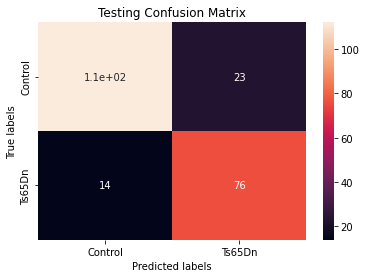

In [ ]:
cm_test_Linear_SVM = confusion_matrix(y_test , y_test_predicted_Linear_SVM)
ax=plt.subplot()
sns.heatmap(cm_test_Linear_SVM , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(['Control', 'Ts65Dn'])
ax.yaxis.set_ticklabels(['Control', 'Ts65Dn'])

RBF SVM

In [ ]:
optimal_RBF_SVM_testing_features = Testing_features[optimal_features_RBF_SVM]         ## it gives the dataframe of testing features which only consists the most important features obtained using RFECV

In [ ]:
RBF_SVM_clfr = SVC(C = 100, gamma = 0.01, kernel = 'rbf')                             ## RBF SVM is defined with best hyperparameter obtained from GridSearchCV using 5 fold cross-validation
RBF_SVM_clfr.fit(training_features[optimal_features_RBF_SVM], y_train)                ## fit on training set consists only important important features obtained using RFECV 
y_predicted_test_RBF_SVM = RBF_SVM_clfr.predict( optimal_RBF_SVM_testing_features)    ## predict on test features

In [ ]:
print(classification_report(y_test , y_predicted_test_RBF_SVM ))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       135
           1       0.66      0.69      0.67        90

    accuracy                           0.73       225
   macro avg       0.72      0.73      0.72       225
weighted avg       0.74      0.73      0.73       225



[Text(0, 0.5, 'Control'), Text(0, 1.5, 'Ts65Dn')]

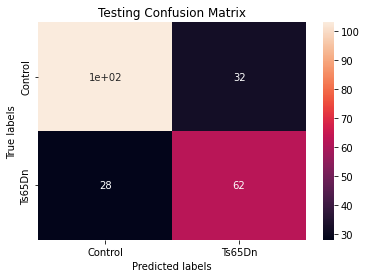

In [ ]:
cm_test_RBF_SVM = confusion_matrix(y_test , y_predicted_test_RBF_SVM)
ax=plt.subplot()
sns.heatmap(cm_test_RBF_SVM , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(['Control', 'Ts65Dn'])
ax.yaxis.set_ticklabels(['Control', 'Ts65Dn'])

Neural Network

In [ ]:
optimal_NN_testing_features = Testing_features[optimal_features_NN]             ## it gives the dataframe of testing features which only consists the most important features obtained using RFECV

In [ ]:
NN_clfr = MLPClassifier(activation = 'relu', alpha = 0.1, hidden_layer_sizes = (128, ), max_iter = 1000, solver = 'lbfgs', early_stopping= True)   ## NN is defined with best hyperparameter obtained from GridSearchCV using 5 fold cross-validation
NN_clfr.fit(training_features[optimal_features_NN], y_train)                                       ## fit on training set consists only important important features obtained using RFECV
y_predicted_test_NN = NN_clfr.predict( optimal_NN_testing_features)                                ## predict on test features

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print(classification_report(y_test , y_predicted_test_NN ))

              precision    recall  f1-score   support

           0       0.86      0.70      0.78       135
           1       0.65      0.83      0.73        90

    accuracy                           0.76       225
   macro avg       0.76      0.77      0.75       225
weighted avg       0.78      0.76      0.76       225



[Text(0, 0.5, 'Control'), Text(0, 1.5, 'Ts65Dn')]

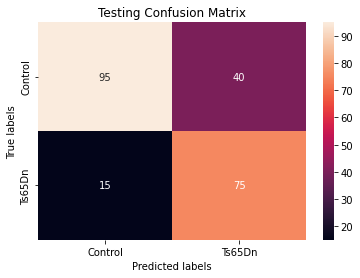

In [ ]:
cm_test_NN = confusion_matrix(y_test , y_predicted_test_NN)
ax=plt.subplot()
sns.heatmap(cm_test_NN , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(['Control', 'Ts65Dn'])
ax.yaxis.set_ticklabels(['Control', 'Ts65Dn'])

Random Forest

In [ ]:
optimal_RF_testing_features = Testing_features[most_important_features_RF]                  ## it gives the dataframe of testing features which only consists the most important features obtained using RFECV

In [ ]:
RF_clfr = RandomForestClassifier( max_depth = 3, max_features = None)                      ## RF is defined with best hyperparameter obtained from GridSearchCV using 5 fold cross-validation
RF_clfr.fit(training_features[most_important_features_RF], y_train)                        ## fit on training set consists only important important features obtained using RFECV
y_predicted_test_RF = RF_clfr.predict( optimal_RF_testing_features)                        ## predict on test features

In [ ]:
print(classification_report(y_test , y_predicted_test_RF ))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       135
           1       0.63      0.64      0.64        90

    accuracy                           0.71       225
   macro avg       0.69      0.70      0.70       225
weighted avg       0.71      0.71      0.71       225



[Text(0, 0.5, 'Control'), Text(0, 1.5, 'Ts65Dn')]

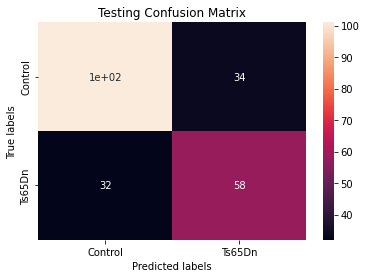

In [ ]:
cm_test_RF = confusion_matrix(y_test , y_predicted_test_RF)
ax=plt.subplot()
sns.heatmap(cm_test_RF , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(['Control', 'Ts65Dn'])
ax.yaxis.set_ticklabels(['Control', 'Ts65Dn'])

Multiclass classification

In [ ]:
testing_label_multiclass = Test_Data['Treatment_Behavior']
y_test_multiclass = label.fit_transform(testing_label_multiclass)

Linear SVM multiclass

In [ ]:
optimal_Linear_SVM_multiclass_testing_features = Testing_features[most_important_features_Linear_SVM_multiclass]

In [ ]:
Linear_SVM_multiclass_clfr = SVC( C = 10, kernel = 'linear')
Linear_SVM_multiclass_clfr.fit(training_features[most_important_features_Linear_SVM_multiclass], y_train_multiclass)
y_predicted_test_Linear_SVM_multiclass = Linear_SVM_multiclass_clfr.predict( optimal_Linear_SVM_multiclass_testing_features)

In [ ]:
print(classification_report(y_test_multiclass , y_predicted_test_Linear_SVM_multiclass ))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77        60
           1       0.98      0.85      0.91        60
           2       0.85      0.55      0.67        60
           3       0.83      0.98      0.90        45

    accuracy                           0.81       225
   macro avg       0.83      0.82      0.81       225
weighted avg       0.83      0.81      0.80       225



[Text(0, 0.5, 'Memantine_C/S'),
 Text(0, 1.5, 'Memantine_S/C'),
 Text(0, 2.5, 'Saline_C/S'),
 Text(0, 3.5, 'Saline_S/C')]

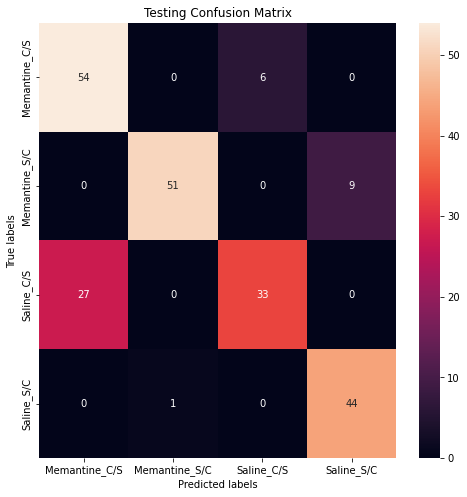

In [ ]:
plt.figure(figsize = (8,8))
cm_test_Linear_SVM_multiclass = confusion_matrix(y_test_multiclass , y_predicted_test_Linear_SVM_multiclass)
ax=plt.subplot()
sns.heatmap(cm_test_Linear_SVM_multiclass , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])
ax.yaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])

RBF SVM multiclass

As RFECV can't be used for RBF kernel SVM... That's why the most important features have been taken from the permutation feature importance metrics

In [ ]:
optimal_RBF_SVM_multiclass_testing_features = Testing_features[optimal_features_RBF_SVM_multiclass]

In [ ]:
RBF_SVM_multiclass_clfr = SVC( C = 100, gamma = 0.01, kernel = 'rbf')
RBF_SVM_multiclass_clfr.fit(training_features[optimal_features_RBF_SVM_multiclass], y_train_multiclass)
y_predicted_test_RBF_SVM_multiclass = RBF_SVM_multiclass_clfr.predict( optimal_RBF_SVM_multiclass_testing_features)

In [ ]:
print(classification_report(y_test_multiclass , y_predicted_test_RBF_SVM_multiclass ))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        60
           1       0.90      0.90      0.90        60
           2       0.78      0.60      0.68        60
           3       0.87      0.87      0.87        45

    accuracy                           0.80       225
   macro avg       0.81      0.80      0.80       225
weighted avg       0.80      0.80      0.79       225



[Text(0, 0.5, 'Memantine_C/S'),
 Text(0, 1.5, 'Memantine_S/C'),
 Text(0, 2.5, 'Saline_C/S'),
 Text(0, 3.5, 'Saline_S/C')]

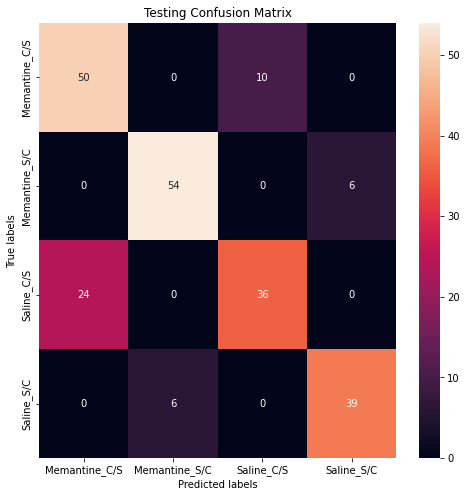

In [ ]:
plt.figure(figsize = (8,8))
cm_test_RBF_SVM_multiclass = confusion_matrix(y_test_multiclass , y_predicted_test_RBF_SVM_multiclass)
ax=plt.subplot()
sns.heatmap(cm_test_RBF_SVM_multiclass , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])
ax.yaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])

Neural Network

Here also Permutation feature importance has been used to fit on the most important features because RFECV can not be used for Neural Network

In [ ]:
optimal_NN_multiclass_testing_features = Testing_features[optimal_features_NN_multiclass]

In [ ]:
NN_multiclass_clfr = MLPClassifier(activation = 'relu', alpha = 0.001, hidden_layer_sizes = (128, ), max_iter = 1000, solver = 'lbfgs', early_stopping= True)
NN_multiclass_clfr.fit(training_features[optimal_features_NN_multiclass], y_train_multiclass)
y_predicted_test_NN_multiclass = NN_multiclass_clfr.predict( optimal_NN_multiclass_testing_features)

In [ ]:
print(classification_report(y_test_multiclass , y_predicted_test_NN_multiclass ))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        60
           1       0.75      0.77      0.76        60
           2       0.86      0.83      0.85        60
           3       0.68      0.67      0.67        45

    accuracy                           0.79       225
   macro avg       0.78      0.78      0.78       225
weighted avg       0.79      0.79      0.79       225



[Text(0, 0.5, 'Memantine_C/S'),
 Text(0, 1.5, 'Memantine_S/C'),
 Text(0, 2.5, 'Saline_C/S'),
 Text(0, 3.5, 'Saline_S/C')]

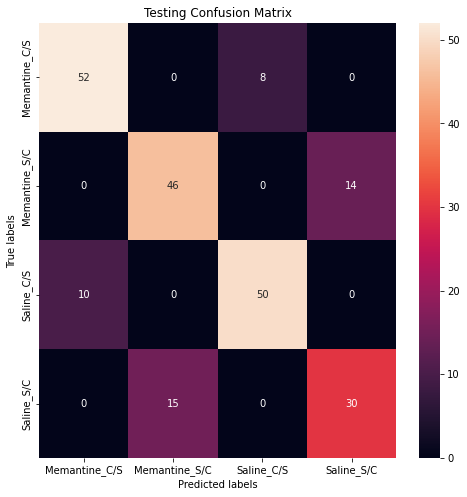

In [ ]:
plt.figure(figsize = (8,8))
cm_test_NN_multiclass = confusion_matrix(y_test_multiclass , y_predicted_test_NN_multiclass)
ax=plt.subplot()
sns.heatmap(cm_test_NN_multiclass , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])
ax.yaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])

Random Forest Multiclass

In [ ]:
optimal_RF_multiclass_testing_features = Testing_features[most_important_features_RF_multiclass]

In [ ]:
RF_multiclass_clfr = RandomForestClassifier(max_depth = 9, max_features = 'log2')
RF_multiclass_clfr.fit(training_features[most_important_features_RF_multiclass], y_train_multiclass)
y_predicted_test_RF_multiclass = RF_multiclass_clfr.predict(optimal_RF_multiclass_testing_features)

In [ ]:
print(classification_report(y_test_multiclass , y_predicted_test_RF_multiclass ))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        60
           1       0.69      0.57      0.62        60
           2       0.91      0.65      0.76        60
           3       0.53      0.67      0.59        45

    accuracy                           0.70       225
   macro avg       0.71      0.70      0.69       225
weighted avg       0.73      0.70      0.70       225



[Text(0, 0.5, 'Memantine_C/S'),
 Text(0, 1.5, 'Memantine_S/C'),
 Text(0, 2.5, 'Saline_C/S'),
 Text(0, 3.5, 'Saline_S/C')]

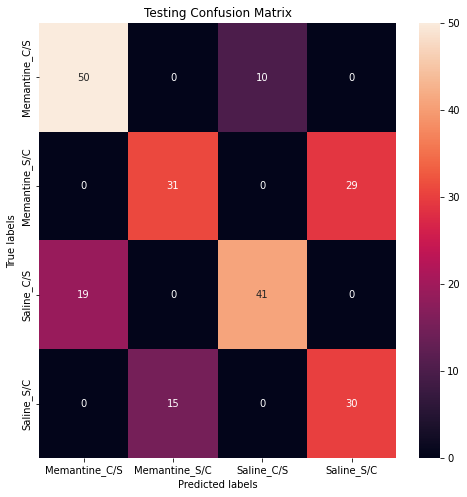

In [ ]:
plt.figure(figsize = (8,8))
cm_test_RF_multiclass = confusion_matrix(y_test_multiclass , y_predicted_test_RF_multiclass)
ax=plt.subplot()
sns.heatmap(cm_test_RF_multiclass , annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])
ax.yaxis.set_ticklabels(['Memantine_C/S', 'Memantine_S/C' , 'Saline_C/S' , 'Saline_S/C'])